# 🧭 TP3 — Merging (Data Integration & EDA Setup)

### 🎯 Objective

The goal of this TP is to build a clean, integrated dataset by merging multiple geospatial and environmental sources, then set up a consistent EDA framework for downstream analysis and modeling. This stage ensures structure, quality, and interoperability across all variables.

***

### 🧩 Data Sources Integrated

- Fire detections: VIIRS attributes (location, intensity, FRP, confidence, day/night, dates).  
- Climate rasters: monthly Tmax, Tmin, and precipitation aggregated at 5′ and sampled at points.  
- Landcover: harmonized classes from Algeria and Tunisia shapefiles (merged layer).  
- Soils (HWSD2): surface layer D1 with physical/chemical properties and texture classes.  
- Elevation: GMTED2010 altitude clipped to the AOI.

All layers are projected to WGS84, spatially clipped to the shared AOI, and exported to a unified tabular format.

***

### 🛠️ Preprocessing Pipeline

- Spatial harmonization: consistent CRS (EPSG:4326) and AOI clipping.  
- Raster-to-point sampling: climate, elevation, and soil grids sampled at target locations.  
- Spatial joins: landcover categories linked to each point.  
- Cleaning: missing values handling and column normalization.  
- Output: a single merged table ready for EDA and modeling.

Deliverable: merged.csv with climate, landcover, soil, elevation, and contextual attributes.

***

### 🧪 What We Will Analyze Next (EDA Plan)

1) General dataset overview  
- Dimensions, dtypes, preview, descriptive statistics.

2) Missing values  
- Percentages, heatmap, integrity checks.

3) Data quality  
- Quality report (types, uniqueness, zeros, negatives), skewness/kurtosis.

4) Distributions & outliers  
- Histograms, boxplots, IQR-based outlier detection, Q–Q plots.

5) Relationships  
- Numeric correlations and pairplots; key scatterplots (e.g., elevation vs Tmax).  
- Distribution comparisons across categories (landcover, TEXTURE_USDA).

6) Temporal patterns  
- Monthly trends for tmax/tmin/precipitation when available.

7) Spatial quicklooks (optional)  
- Point densities and thematic maps if coordinates are present.

***

### 🔑 Key Variables in the Merged Dataset

- Climate: tmax, tmin, tprec, month.  
- Terrain: elevation.  
- Landcover: GRIDCODE or class code.  
- Soil (HWSD2 D1): COARSE, SAND, SILT, CLAY, TEXTURE_USDA, TEXTURE_SOTER, BULK, REF_BULK, ORG_CARBON, PH_WATER, TOTAL_N, CN_RATIO, CEC_SOIL, CEC_CLAY, CEC_EFF, TEB, BSAT, ALUM_SAT, ESP, TCARBON_EQ, GYPSUM, ELEC_COND.  
- Context (optional): daynight, FRP, dates.

***

### 🧱 Code Organization

- eda_utils.py centralizes reusable analytical and plotting utilities:  
  - Descriptive and quality reports.  
  - Visualizations: histograms, boxplots, scatterplots, heatmaps, pairplots, Q–Q plots.  
  - Geospatial helpers for quick mapping.

- Notebooks remain lean by importing these functions and applying them to each dataset and to the merged table.

***

### 📦 Main Libraries

| Category | Library | Description |
|---|---|---|
| Data manipulation | pandas, numpy | Loading, cleaning, and stats |
| Visualization | matplotlib, seaborn | Graphs and exploratory plots |
| Geospatial | geopandas | Reading and plotting spatial data |
| Custom tools | eda_utils.py | Reusable EDA helpers |

***

### 🧠 Expected Outcome

By the end of this step, we will have:  
- A documented, reproducible merge of all sources into one coherent dataset.  
- A comprehensive EDA baseline revealing structure, quality, distributions, and relationships.  
- Actionable insights and a prioritized checklist for feature engineering and modeling.

If you want, this header can be duplicated into a README cell and a short project README.md to keep the storyline consistent across the repo.

# Merging Data

In [ ]:
from scripts.dataMerging.combineDatasets import extract_features_elevation , extract_features_landcover , extract_features_monthly_clim , extract_features_soil , organize_monthly_climat_files
from scripts.tools.merge_data_sources import merge_data_sources


## ☁️ Climat Dataset ☁️



In [2]:

# Organize the files
monthly_tmax_data = organize_monthly_climat_files(
    "../data/climate_dataset/5min/max/*.tif"
)
monthly_tmin_data = organize_monthly_climat_files(
    "../data/climate_dataset/5min/min/*.tif"
)
monthly_tprec_data = organize_monthly_climat_files(
    "../data/climate_dataset/5min/prec/*.tif"
)


fires_tmax = extract_features_monthly_clim(
    fire_csv="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_dict=monthly_tmax_data,
    output_path="../data/features/fire_tmax.csv",
    value_name="tmax",
)


fires_tmin = extract_features_monthly_clim(
    fire_csv="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_dict=monthly_tmin_data,
    output_path="../data/features/fire_tmin.csv",
    value_name="tmin",
)


fires_tprec = extract_features_monthly_clim(
    fire_csv="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_dict=monthly_tprec_data,
    output_path="../data/features/fire_tprec.csv",
    value_name="tprec",
)

✅ Extracted tmax for month 01 (6355 points)
✅ Extracted tmax for month 02 (5469 points)
✅ Extracted tmax for month 03 (8783 points)
✅ Extracted tmax for month 04 (6687 points)
✅ Extracted tmax for month 05 (7623 points)
✅ Extracted tmax for month 06 (7030 points)
✅ Extracted tmax for month 07 (8664 points)
✅ Extracted tmax for month 08 (8973 points)
✅ Extracted tmax for month 09 (7051 points)
✅ Extracted tmax for month 10 (8619 points)
✅ Extracted tmax for month 11 (8211 points)
✅ Extracted tmax for month 12 (6785 points)
💾 Saved to ../data/features/fire_tmax.csv
✅ Extracted tmin for month 01 (6355 points)
✅ Extracted tmin for month 02 (5469 points)
✅ Extracted tmin for month 03 (8783 points)
✅ Extracted tmin for month 04 (6687 points)
✅ Extracted tmin for month 05 (7623 points)
✅ Extracted tmin for month 06 (7030 points)
✅ Extracted tmin for month 07 (8664 points)
✅ Extracted tmin for month 08 (8973 points)
✅ Extracted tmin for month 09 (7051 points)
✅ Extracted tmin for month 10 (861

## 🟩 Landcover 🟩

In [3]:

fires_with_landcover = extract_features_landcover(
    csv_path="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    shapefile_path="../data/land_dataset/combined/alg_tun_landcvr.shx",
    lat_col="latitude",
    lon_col="longitude",
    keep_cols=["GRIDCODE"],  # can be ["GRIDCODE", "CLASS", "AREA", ...]
    output_path="../data/features/fire_landcover.csv",
)


## 🌱 Soil 🌱

In [6]:
fires_with_soil = extract_features_soil(
    csv_path="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_path="../data/soil_dataset/original/HWSD2_RASTER/HWSD2.bil",
    soil_attributes_csv="../data/soil_dataset/simplified/D1_soil_features_alg_tun.csv",
    output_soil_ids="../data/features/fire_soil_ids.csv",
    output_soil_feature="../data/features/fire_soil.csv",
)

## 🏔️ Elevation 🏔️

In [7]:
fires_with_elevation = extract_features_elevation(
    raster_path="../data/elevation_dataset/elevation_clipped.tif",
    fire_csv_path="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    output_csv="../data/features/fire_elevation.csv",
    value_name="elevation",
)


Loaded 90250 points from ../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv


Extracting elevation: 100%|██████████| 90250/90250 [00:06<00:00, 14606.00it/s]


✅ Saved extracted values to ../data/features/fire_elevation.csv


## 🔥 Merging with Fire Data 🔥

In [17]:
sources = ["../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv","../data/features/fire_tmin.csv" , "../data/features/fire_tmax.csv" , "../data/features/fire_tprec.csv"]
temp_df = merge_data_sources(sources , ["latitude","longitude","acq_date"], "inner")

csv_list= [temp_df,  "../data/features/fire_landcover.csv" , "../data/features/fire_elevation.csv" , "../data/features/fire_soil.csv"]
temp_df = merge_data_sources(
    csv_list,
    on=["latitude", "longitude"],
    how="inner",
    output_path="../data/Merged/merged.csv"
)


Merged CSV saved to: ../data/Merged/merged.csv


# 🔎 EDA & Preprocessing — Merged Dataset

This section analyzes the integrated dataset (climate, soils, landcover, elevation, and context), validates data quality, visualizes distributions and relationships, then applies light preprocessing to produce a model‑ready table.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from eda_scripts.eda_utils import (
    describe_dataset, check_missing_values, plot_missing_values,
    data_quality_report, summary_stats, report_skew_kurtosis,
    plot_variable_distribution, plot_boxplot, plot_scatter,
    plot_correlation_matrix, plot_pairplot, compare_distributions,
    detect_outliers_iqr, visualize_outliers, plot_qq,
    plot_multiple_distributions, plot_categorical_distribution
)

merged = pd.read_csv("../data/Merged/merged.csv")


## 🧭 Overview

High‑level snapshot of the merged table: shape, data types, first rows, and initial descriptive statistics of data columns.


In [3]:
describe_dataset(merged)

=== 🧾 Dataset Preview ===


latitude  longitude  bright_ti4_x  scan_x  track_x  acq_date_x  acq_time_x  \
0  27.72818    9.87200        295.51    0.76     0.77  2024-01-01           3   
1  28.63288    9.77909        301.80    0.79     0.78  2024-01-01           3   
2  28.64012    9.77953        298.65    0.79     0.78  2024-01-01           3   
3  36.74886    6.25409        338.04    0.46     0.39  2024-01-01         141   
4  35.87978    4.44782        309.49    0.41     0.37  2024-01-01         141   

  satellite_x instrument_x confidence_x  ...  CEC_SOIL  CEC_CLAY  CEC_EFF  \
0         N20        VIIRS            n  ...        -4        -4     -4.0   
1         N20        VIIRS            n  ...        13        74     30.0   
2         N20        VIIRS            n  ...        13        74     30.0   
3         N20        VIIRS            n  ...        -9        -9     -9.0   
4         N20        VIIRS            n  ...        -9        -9     -9.0   

    TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  GYPSUM  ELEC_COND  
0  -4.0    -4        -4   -4        -4.0    -4.0         -4  
1  30.0   100         0    3         8.0     4.0          1  
2  30.0   100         0    3         8.0     4.0          1  
3  -9.0    -9        -9   -9        -9.0    -9.0         -9  
4  -9.0    -9        -9   -9        -9.0    -9.0         -9  

[5 rows x 56 columns]


=== ℹ️ General Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161881 entries, 0 to 161880
Data columns (total 56 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       161881 non-null  float64
 1   longitude      161881 non-null  float64
 2   bright_ti4_x   161881 non-null  float64
 3   scan_x         161881 non-null  float64
 4   track_x        161881 non-null  float64
 5   acq_date_x     161881 non-null  object 
 6   acq_time_x     161881 non-null  int64  
 7   satellite_x    161881 non-null  object 
 8   instrument_x   161881 non-null  object 
 9   confidence_x   161881 non-null  object 
 10  version_x      161881 non-null  int64  
 11  bright_ti5_x   161881 non-null  float64
 12  frp_x          161881 non-null  float64
 13  daynight_x     161881 non-null  object 
 14  type_x         161881 non-null  int64  
 15  tmin           161616 non-null  float64
 16  tmax           161616 non-null  float64
 1

bright_ti4_x         scan_x        track_x     acq_time_x  version_x  \
count  161881.000000  161881.000000  161881.000000  161881.000000   161881.0   
mean      320.439481       0.474380       0.512760     380.368604        2.0   
std        18.362877       0.100318       0.125929     477.613976        0.0   
min       240.170000       0.320000       0.360000       0.000000        2.0   
25%       304.680000       0.400000       0.390000     103.000000        2.0   
50%       315.300000       0.450000       0.490000     142.000000        2.0   
75%       337.010000       0.530000       0.610000     233.000000        2.0   
max       367.000000       0.800000       0.780000    1410.000000        2.0   

        bright_ti5_x          frp_x         type_x           tmin  \
count  161881.000000  161881.000000  161881.000000  161616.000000   
mean      291.515588       3.551109       1.676126      16.805542   
std        11.515187       5.660656       0.750285       7.918707   
min       244.790000       0.060000       0.000000       0.250000   
25%       282.920000       1.100000       2.000000      10.000000   
50%       290.460000       1.970000       2.000000      17.000000   
75%       297.830000       3.950000       2.000000      23.000000   
max       355.420000     251.890000       3.000000      31.000000   

                tmax  ...       CEC_SOIL       CEC_CLAY        CEC_EFF  \
count  161616.000000  ...  161881.000000  161881.000000  161881.000000   
mean       30.776027  ...      10.181565      47.411197      24.925921   
std         8.676278  ...       8.326182      28.196457      16.683225   
min         8.250000  ...      -9.000000      -9.000000      -9.000000   
25%        23.250000  ...       6.000000      35.000000      18.000000   
50%        31.000000  ...      13.000000      55.000000      30.000000   
75%        37.500000  ...      14.000000      71.000000      37.000000   
max        47.000000  ...      41.000000      83.000000     143.000000   

                 TEB           BSAT       ALUM_SAT            ESP  \
count  161881.000000  161881.000000  161881.000000  161881.000000   
mean       22.196323      72.822728      -0.682446       2.264892   
std        17.726634      38.189049       2.214905       5.958272   
min        -9.000000      -9.000000      -9.000000      -9.000000   
25%        10.000000      64.000000       0.000000       2.000000   
50%        30.000000      97.000000       0.000000       3.000000   
75%        38.000000     100.000000       0.000000       3.000000   
max       143.000000     100.000000      40.000000      67.000000   

          TCARBON_EQ         GYPSUM      ELEC_COND  
count  161881.000000  161881.000000  161881.000000  
mean        6.220975       0.632434       0.270396  
std         6.383683       4.122991       2.711118  
min        -9.000000      -9.000000      -9.000000  
25%         0.000000       0.200000       1.000000  
50%         8.000000       0.300000       1.000000  
75%        11.300000       2.100000       1.000000  
max        27.900000      57.599998      32.000000  

[8 rows x 43 columns]

## 🧼 Missing Values

Quantify missingness by column and visualize the overall pattern to guide imputation.


⚠️ Missing values detected:


TEXTURE_USDA    17.547458
REF_BULK        17.547458
tmax             0.163700
tmin             0.163700
tprec            0.163700
GRIDCODE         0.158141
dtype: float64

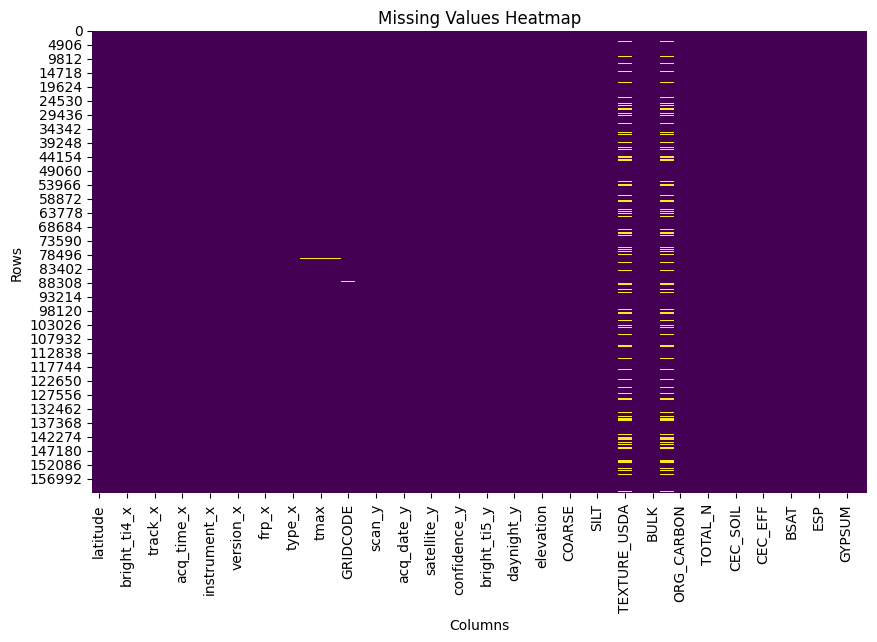

In [4]:
check_missing_values(merged)
plot_missing_values(merged)


## ✅ Data Quality & Basic Statistics

Compact data‑quality report (types, uniqueness, zeros, negatives) and summary statistics for relevant numeric variables, along with distribution shape indicators (skewness and kurtosis).


In [5]:
num_cols = [
    "elevation","tmax","tmin","tprec",
    "COARSE","SAND","SILT","CLAY","BULK","REF_BULK","ORG_CARBON","PH_WATER",
    "TOTAL_N","CN_RATIO","CEC_SOIL","CEC_CLAY","CEC_EFF","TEB","BSAT",
    "ALUM_SAT","ESP","TCARBON_EQ","GYPSUM","ELEC_COND"
]
num_cols = [c for c in num_cols if c in merged.columns]

data_quality_report(merged)
print(summary_stats(merged, num_cols))
report_skew_kurtosis(merged, num_cols)


=== Data Quality Report ===


Data Type  Missing (%)  Unique Values  Zeros (%)  \
REF_BULK        float64    17.547458             37   0.000000   
TEXTURE_USDA    float64    17.547458              7   0.000000   
tprec           float64     0.163700           1434   6.491188   
tmin            float64     0.163700            119   0.000000   
tmax            float64     0.163700            153   0.000000   
GRIDCODE        float64     0.158141             17   0.000000   
CEC_EFF         float64     0.000000             49   0.000000   
ALUM_SAT          int64     0.000000             16  81.667398   
CN_RATIO        float64     0.000000             13   0.000000   
CLAY              int64     0.000000             33   0.000000   
CEC_SOIL          int64     0.000000             32   0.000000   
COARSE            int64     0.000000             27   0.000000   
GYPSUM          float64     0.000000             31   0.479364   
HWSD2_SMU_ID      int64     0.000000            214   0.000000   
ELEC_COND         int64     0.000000             10   2.313428   
ESP               int64     0.000000             21   0.000000   
PH_WATER        float64     0.000000             34   0.000000   
ORG_CARBON      float64     0.000000             83   0.000000   
SILT              int64     0.000000             34   0.000000   
SAND              int64     0.000000             45   0.000000   
TCARBON_EQ      float64     0.000000             53   9.062830   
BSAT              int64     0.000000             33   0.000000   
BULK            float64     0.000000             44   0.000000   
CEC_CLAY          int64     0.000000             44   0.000000   
TOTAL_N         float64     0.000000             68   0.000000   
TEXTURE_SOTER    object     0.000000              4   0.000000   
TEB             float64     0.000000             52   0.000000   
acq_date_x       object     0.000000            364   0.000000   
bright_ti4_x    float64     0.000000           6189   0.000000   
acq_date_y       object     0.000000            364   0.000000   
acq_time_x        int64     0.000000            348   0.000618   
acq_time_y        int64     0.000000            348   0.000618   
confidence_x     object     0.000000              3   0.000000   
confidence_y     object     0.000000              3   0.000000   
daynight_x       object     0.000000              2   0.000000   
daynight_y       object     0.000000              2   0.000000   
elevation         int64     0.000000           1110   0.998264   
bright_ti4_y    float64     0.000000           6189   0.000000   
bright_ti5_x    float64     0.000000           6180   0.000000   
bright_ti5_y    float64     0.000000           6180   0.000000   
instrument_x     object     0.000000              1   0.000000   
frp_y           float64     0.000000           2565   0.000000   
frp_x           float64     0.000000           2565   0.000000   
instrument_y     object     0.000000              1   0.000000   
satellite_x      object     0.000000              1   0.000000   
satellite_y      object     0.000000              1   0.000000   
longitude       float64     0.000000          56922   0.000000   
latitude        float64     0.000000          54957   0.000000   
scan_y          float64     0.000000             49   0.000000   
scan_x          float64     0.000000             49   0.000000   
track_x         float64     0.000000             43   0.000000   
track_y         float64     0.000000             43   0.000000   
type_x            int64     0.000000              3  16.528190   
type_y            int64     0.000000              3  16.528190   
version_x         int64     0.000000              1   0.000000   
version_y         int64     0.000000              1   0.000000   

               Negative Values (%)  
REF_BULK                  0.000000  
TEXTURE_USDA              0.000000  
tprec                     0.000000  
tmin                      0.000000  
tmax                      0.000000  
GRIDCODE                  0.0

            elevation           tmax           tmin          tprec  \
mean       338.595215      30.776027      16.805542       7.436600   
median     227.000000      31.000000      17.000000       3.100000   
std        259.565818       8.676278       7.918707      14.337533   
min        -28.000000       8.250000       0.250000       0.000000   
max       1898.000000      47.000000      31.000000     223.775000   
count   161881.000000  161616.000000  161616.000000  161616.000000   

               COARSE           SAND           SILT           CLAY  \
mean         8.989369      41.605970      23.947134      14.553956   
median      12.000000      49.000000      27.000000      16.000000   
std          8.003712      23.882086      14.390355      10.958320   
min         -9.000000      -9.000000      -9.000000      -9.000000   
max         46.000000      90.000000      53.000000      55.000000   
count   161881.000000  161881.000000  161881.000000  161881.000000   

                 B

## 📈 Distributions & Outliers

Explore univariate behavior using histograms and boxplots, detect outliers with the IQR rule, and assess normality via Q–Q plots.


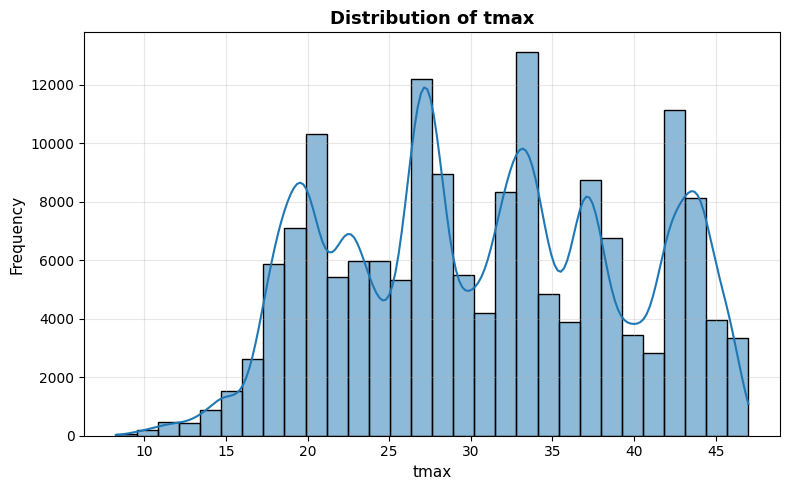

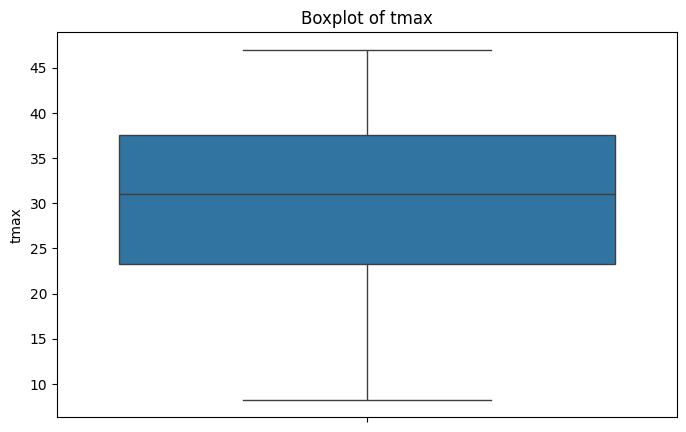

=== Outlier Detection Report for 'tmax' ===
Q1 (25th percentile): 23.2500
Q2 (Median):          31.0000
Q3 (75th percentile): 37.5000
IQR (Q3 - Q1):        14.2500
Lower bound:          1.8750
Upper bound:          58.8750
Number of outliers:   0 / 161881 rows


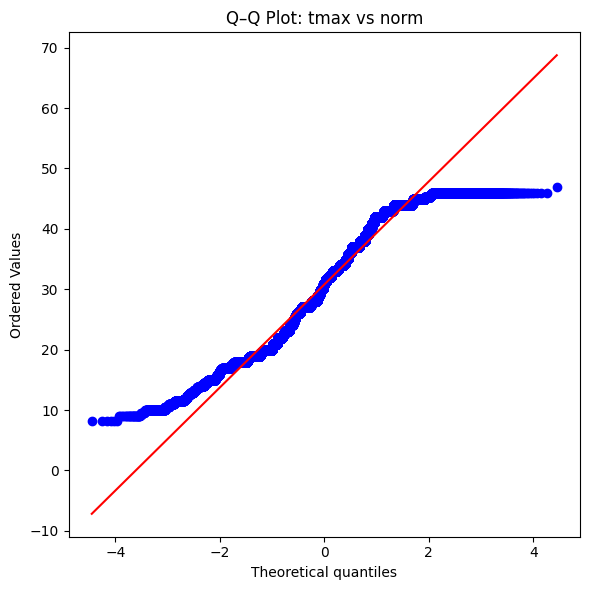

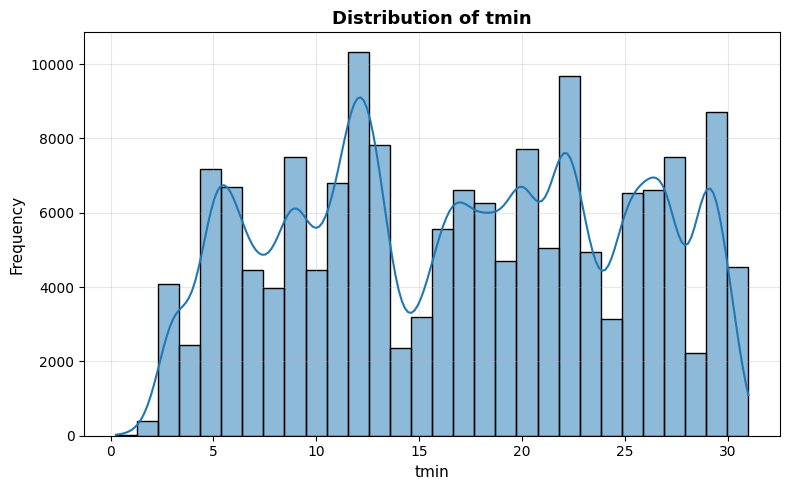

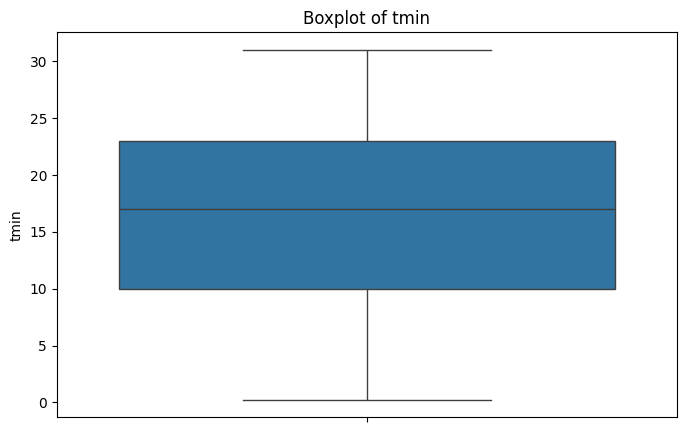

=== Outlier Detection Report for 'tmin' ===
Q1 (25th percentile): 10.0000
Q2 (Median):          17.0000
Q3 (75th percentile): 23.0000
IQR (Q3 - Q1):        13.0000
Lower bound:          -9.5000
Upper bound:          42.5000
Number of outliers:   0 / 161881 rows


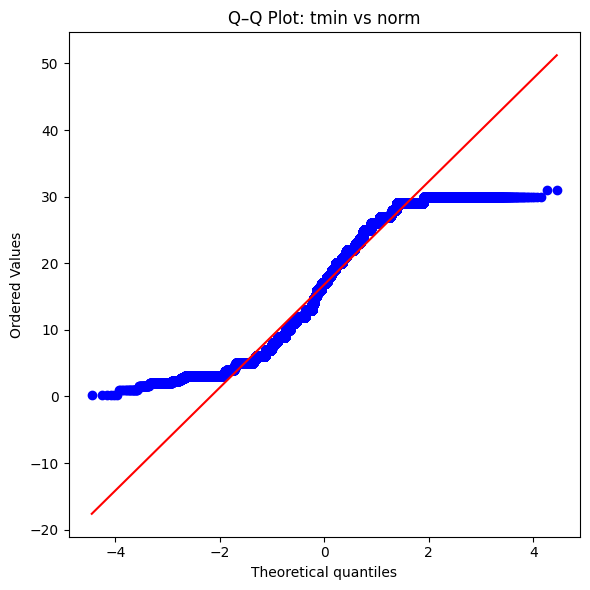

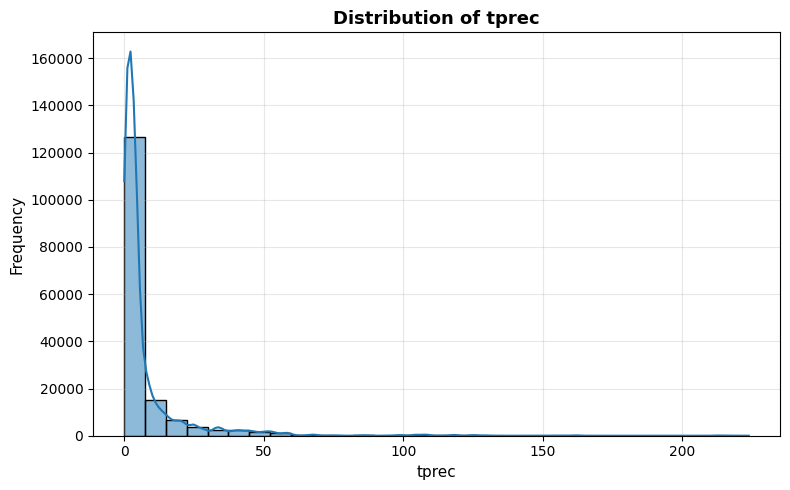

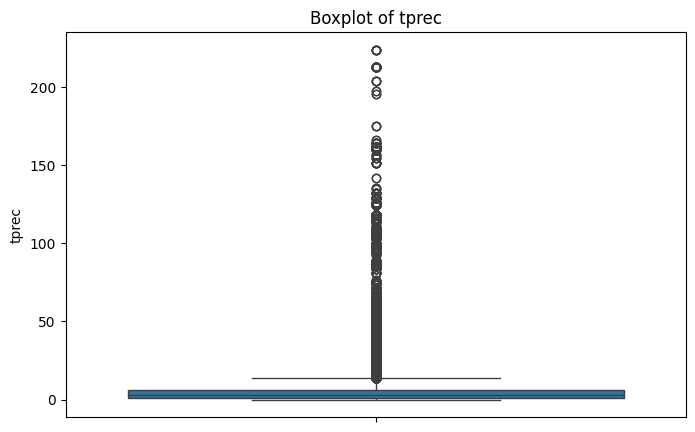

=== Outlier Detection Report for 'tprec' ===
Q1 (25th percentile): 1.1000
Q2 (Median):          3.1000
Q3 (75th percentile): 6.2500
IQR (Q3 - Q1):        5.1500
Lower bound:          -6.6250
Upper bound:          13.9750
Number of outliers:   20756 / 161881 rows


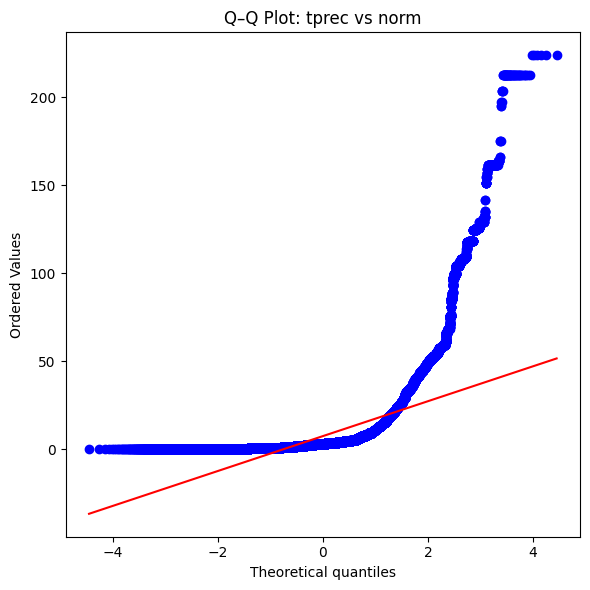

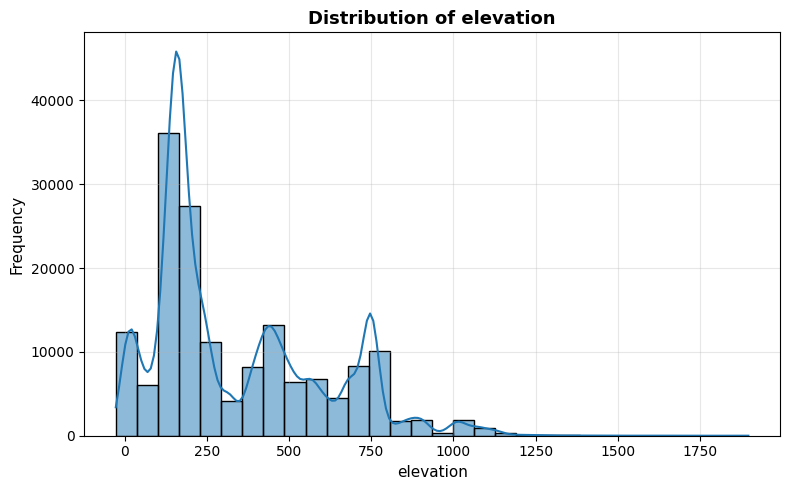

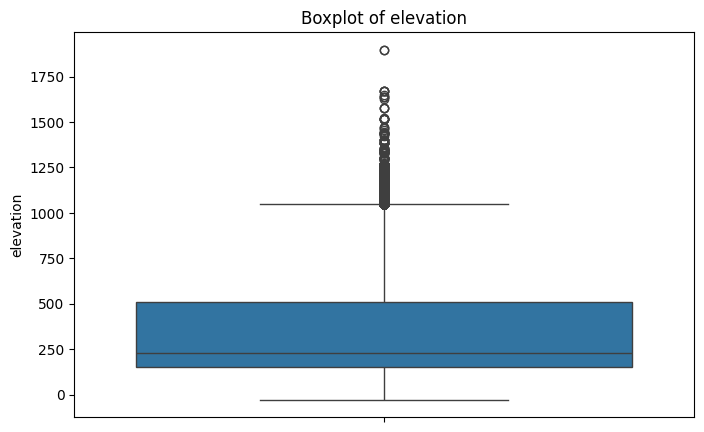

=== Outlier Detection Report for 'elevation' ===
Q1 (25th percentile): 152.0000
Q2 (Median):          227.0000
Q3 (75th percentile): 511.0000
IQR (Q3 - Q1):        359.0000
Lower bound:          -386.5000
Upper bound:          1049.5000
Number of outliers:   1749 / 161881 rows


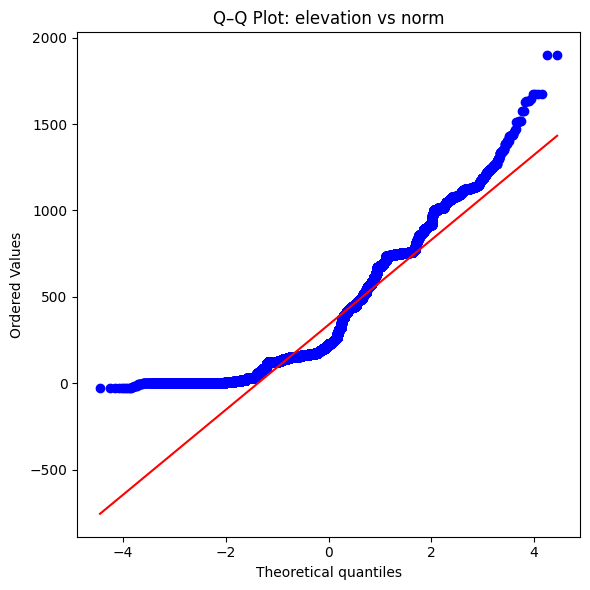

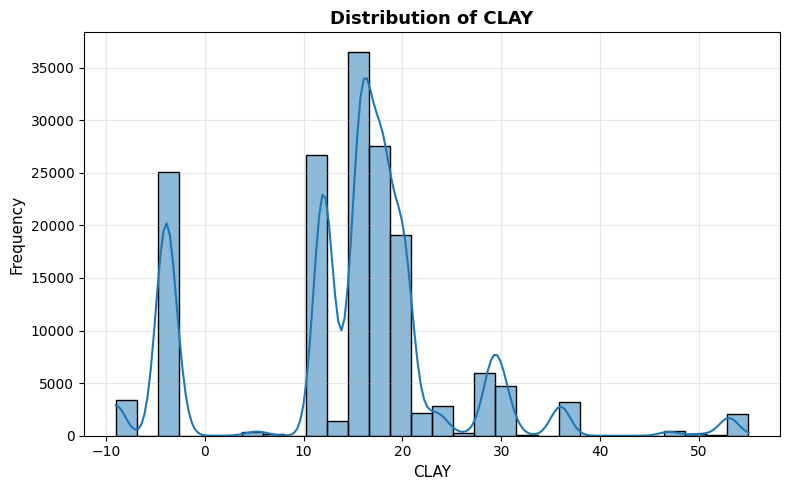

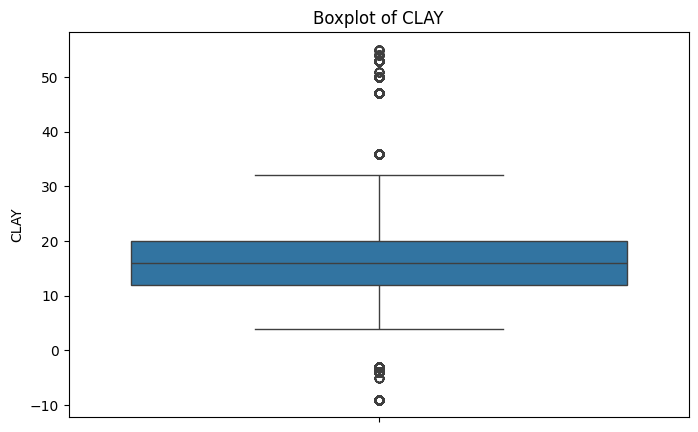

=== Outlier Detection Report for 'CLAY' ===
Q1 (25th percentile): 12.0000
Q2 (Median):          16.0000
Q3 (75th percentile): 20.0000
IQR (Q3 - Q1):        8.0000
Lower bound:          0.0000
Upper bound:          32.0000
Number of outliers:   34270 / 161881 rows


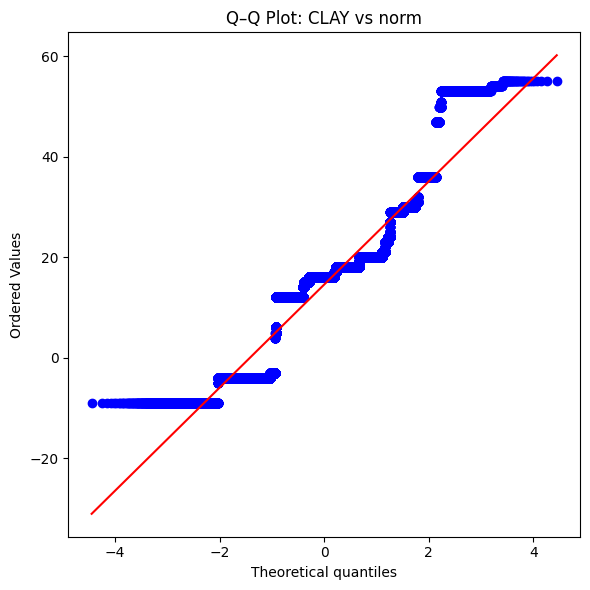

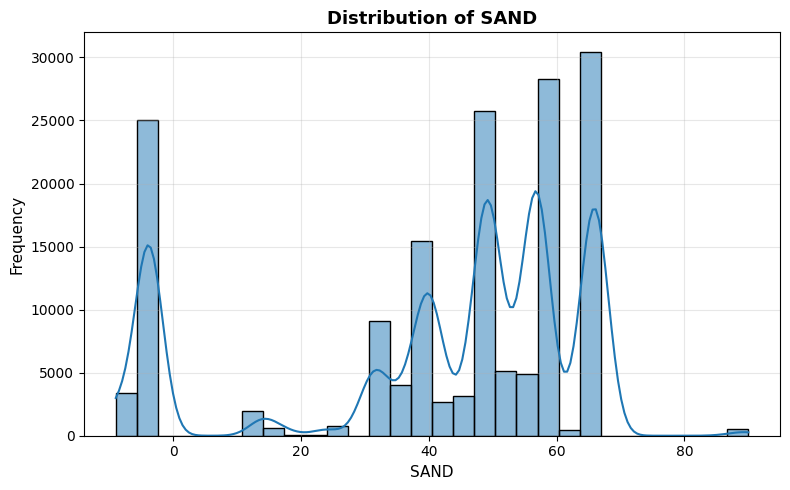

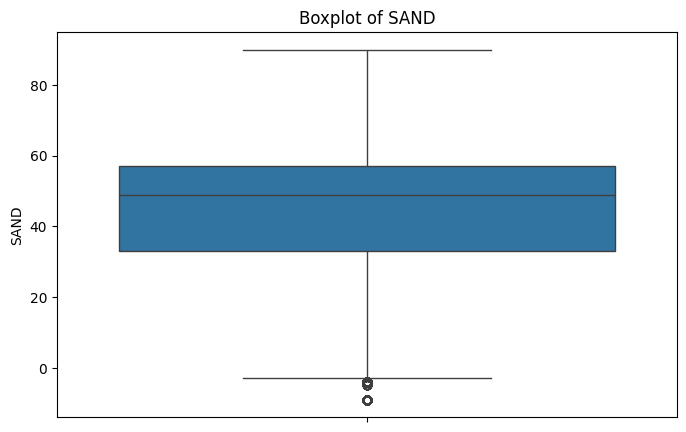

=== Outlier Detection Report for 'SAND' ===
Q1 (25th percentile): 33.0000
Q2 (Median):          49.0000
Q3 (75th percentile): 57.0000
IQR (Q3 - Q1):        24.0000
Lower bound:          -3.0000
Upper bound:          93.0000
Number of outliers:   24535 / 161881 rows


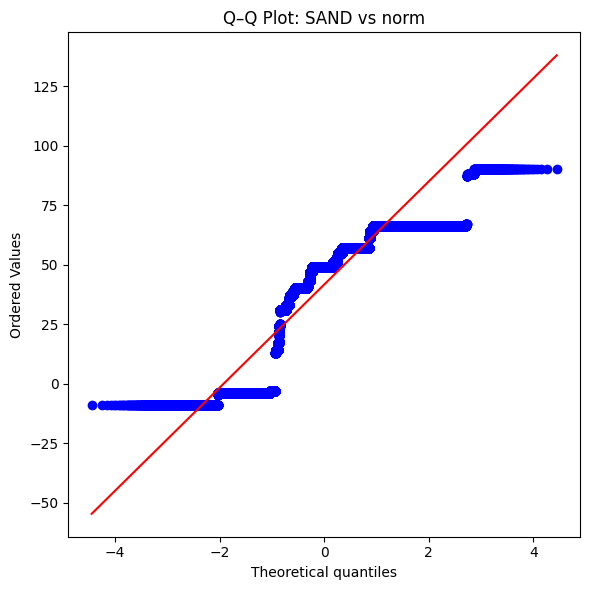

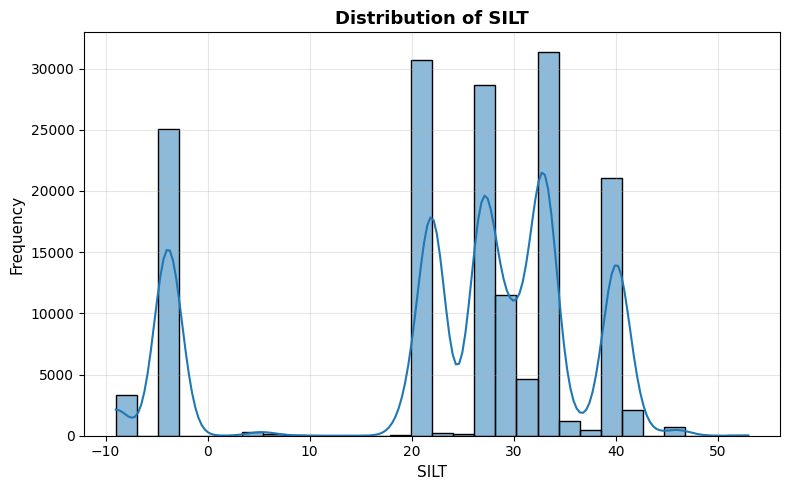

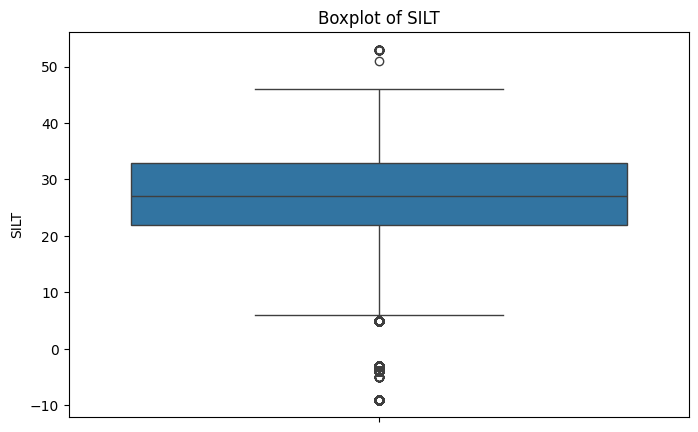

=== Outlier Detection Report for 'SILT' ===
Q1 (25th percentile): 22.0000
Q2 (Median):          27.0000
Q3 (75th percentile): 33.0000
IQR (Q3 - Q1):        11.0000
Lower bound:          5.5000
Upper bound:          49.5000
Number of outliers:   28764 / 161881 rows


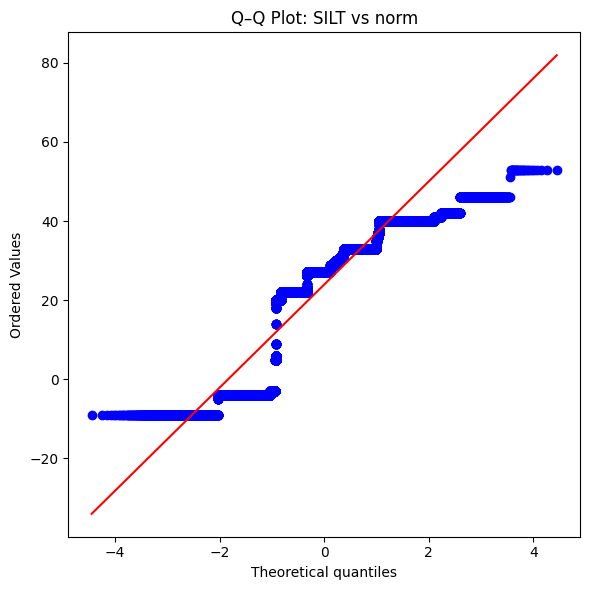

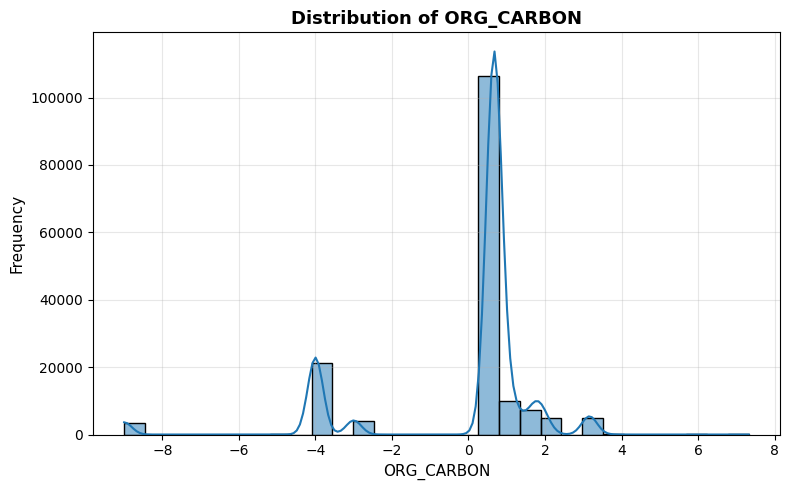

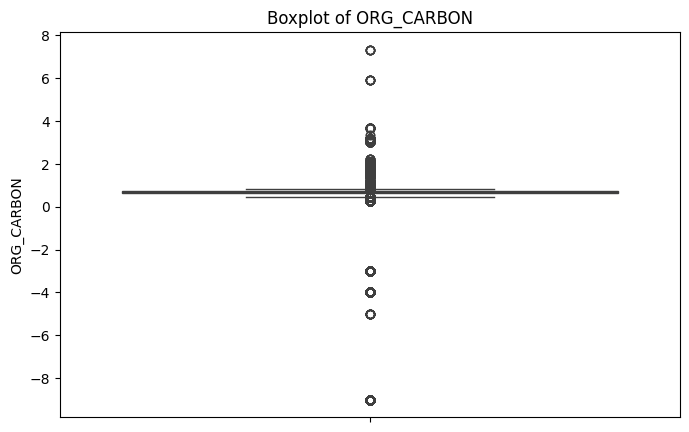

=== Outlier Detection Report for 'ORG_CARBON' ===
Q1 (25th percentile): 0.6160
Q2 (Median):          0.6950
Q3 (75th percentile): 0.7110
IQR (Q3 - Q1):        0.0950
Lower bound:          0.4735
Upper bound:          0.8535
Number of outliers:   55958 / 161881 rows


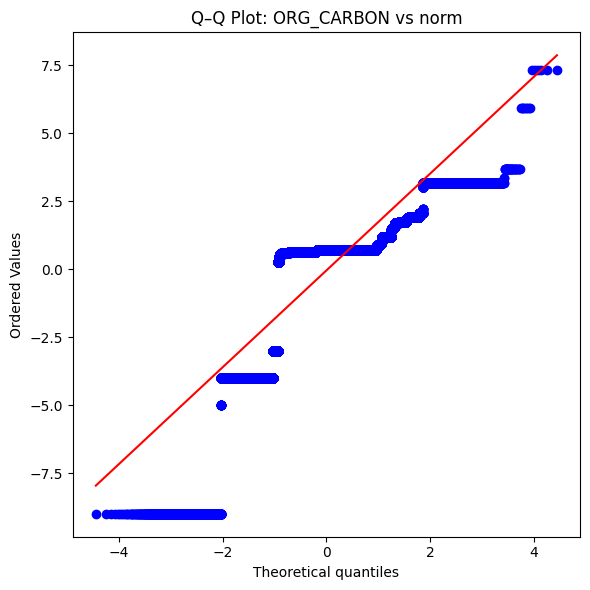

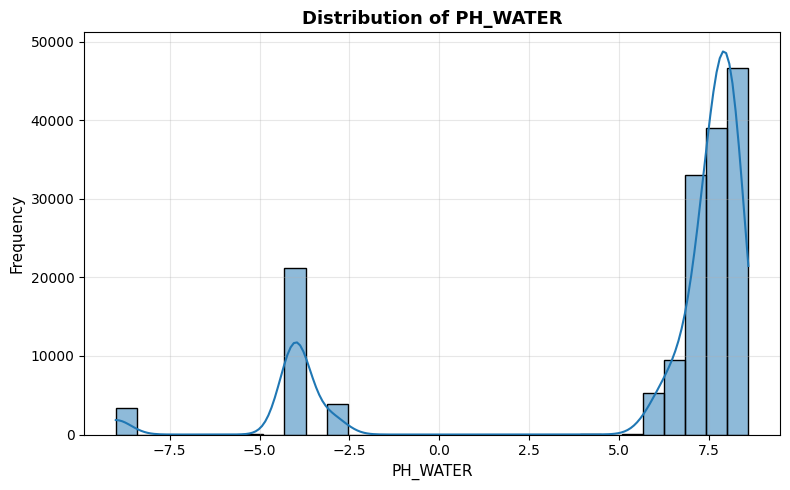

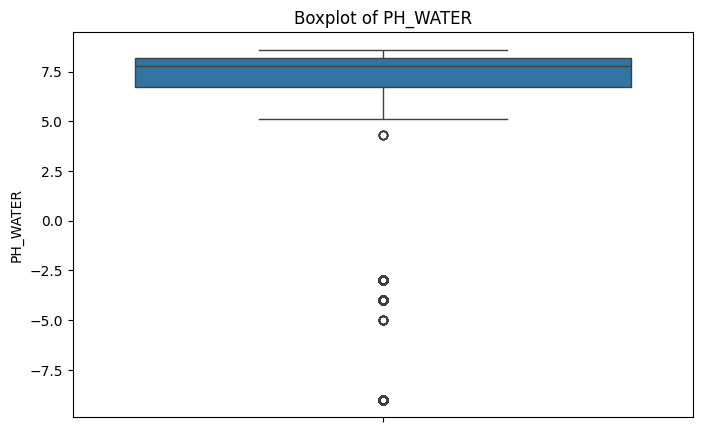

=== Outlier Detection Report for 'PH_WATER' ===
Q1 (25th percentile): 6.7000
Q2 (Median):          7.8000
Q3 (75th percentile): 8.2000
IQR (Q3 - Q1):        1.5000
Lower bound:          4.4500
Upper bound:          10.4500
Number of outliers:   28412 / 161881 rows


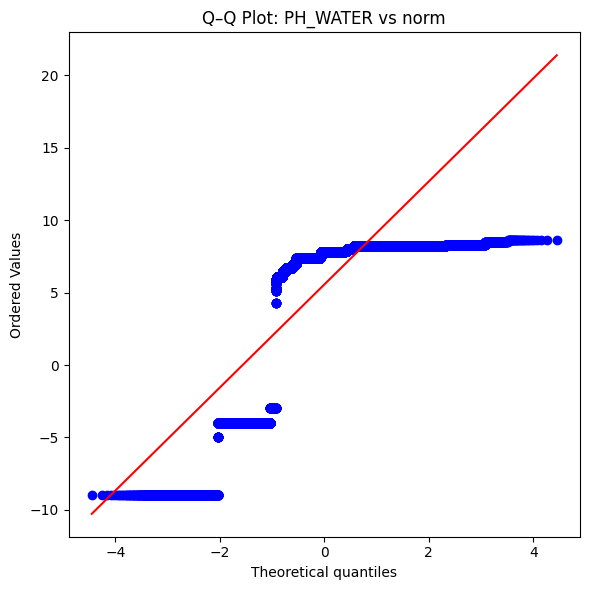

In [6]:
focus = [c for c in ["tmax","tmin","tprec","elevation","CLAY","SAND","SILT","ORG_CARBON","PH_WATER"] if c in merged.columns]

for col in focus:
    plot_variable_distribution(merged, col, bins=30)
    plot_boxplot(merged, col)
    detect_outliers_iqr(merged, col)
    #visualize_outliers(merged, col)
    plot_qq(merged, col)


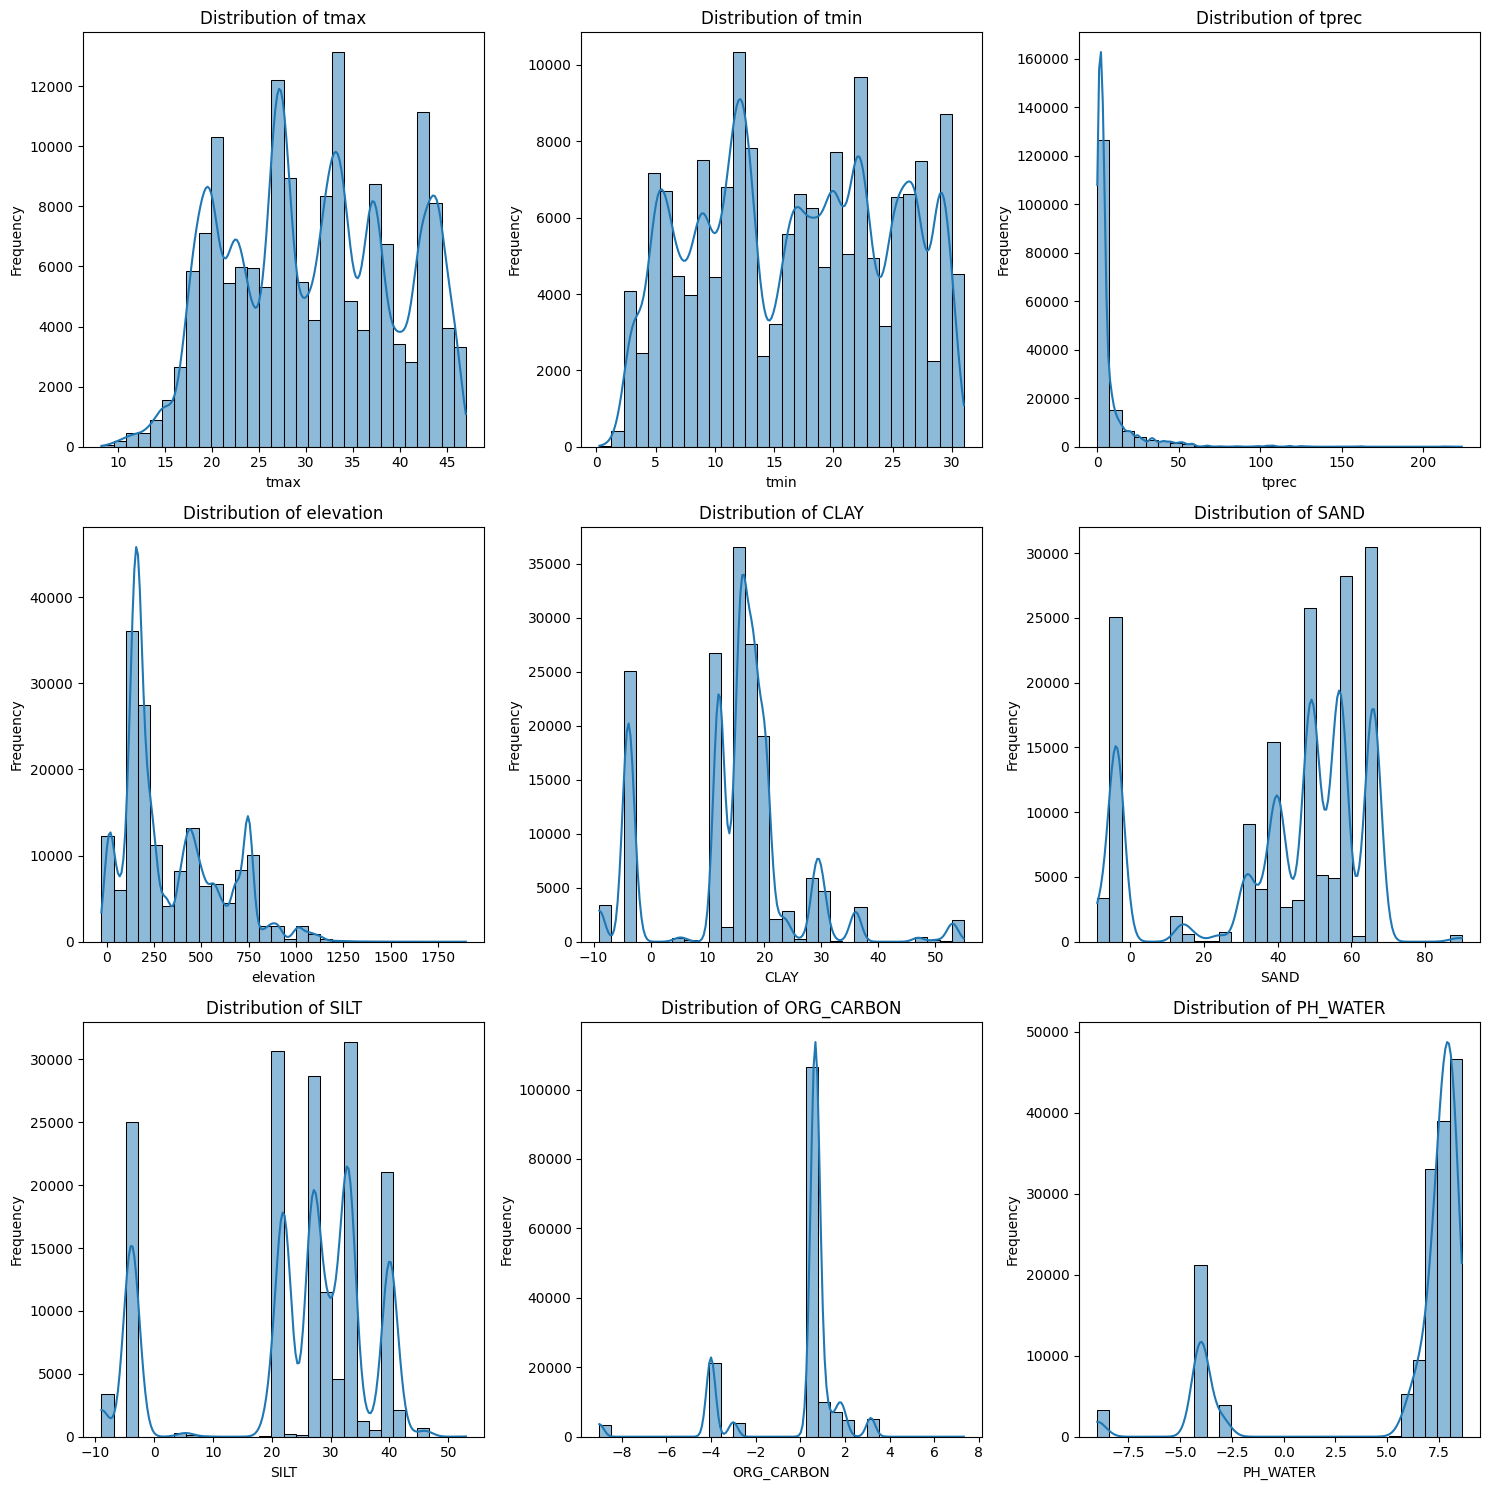

In [7]:
plot_multiple_distributions(merged, [c for c in focus if merged[c].dtype!=object], bins=30)


## 🔗 Correlations & Pairplots

Compute the correlation matrix for numeric variables and inspect multivariate relationships with pairplots (optionally colored by a categorical class).


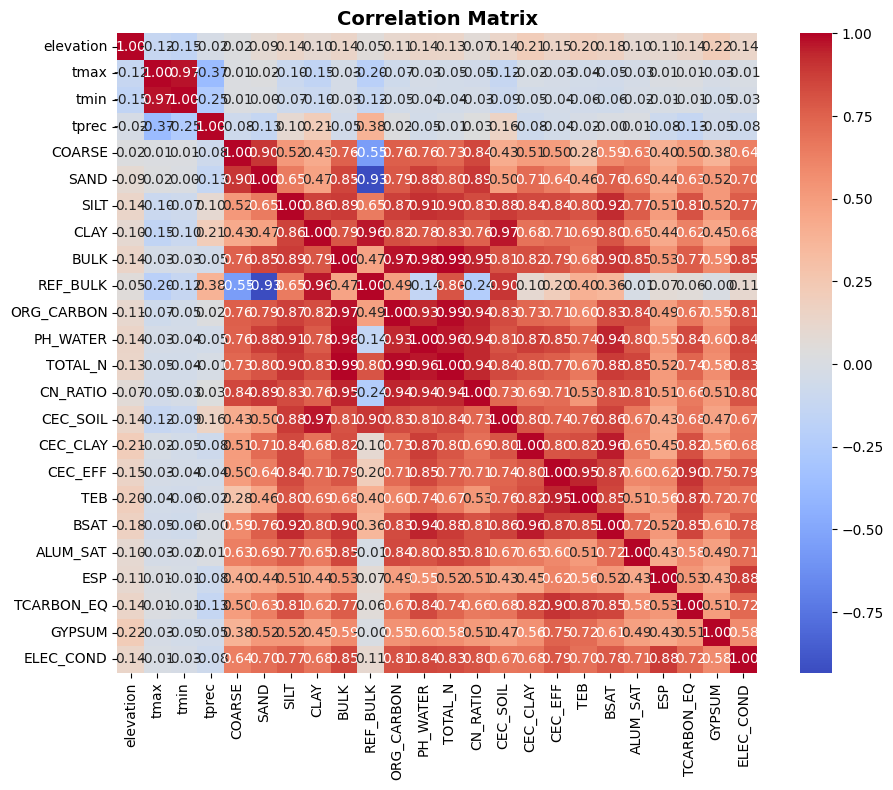

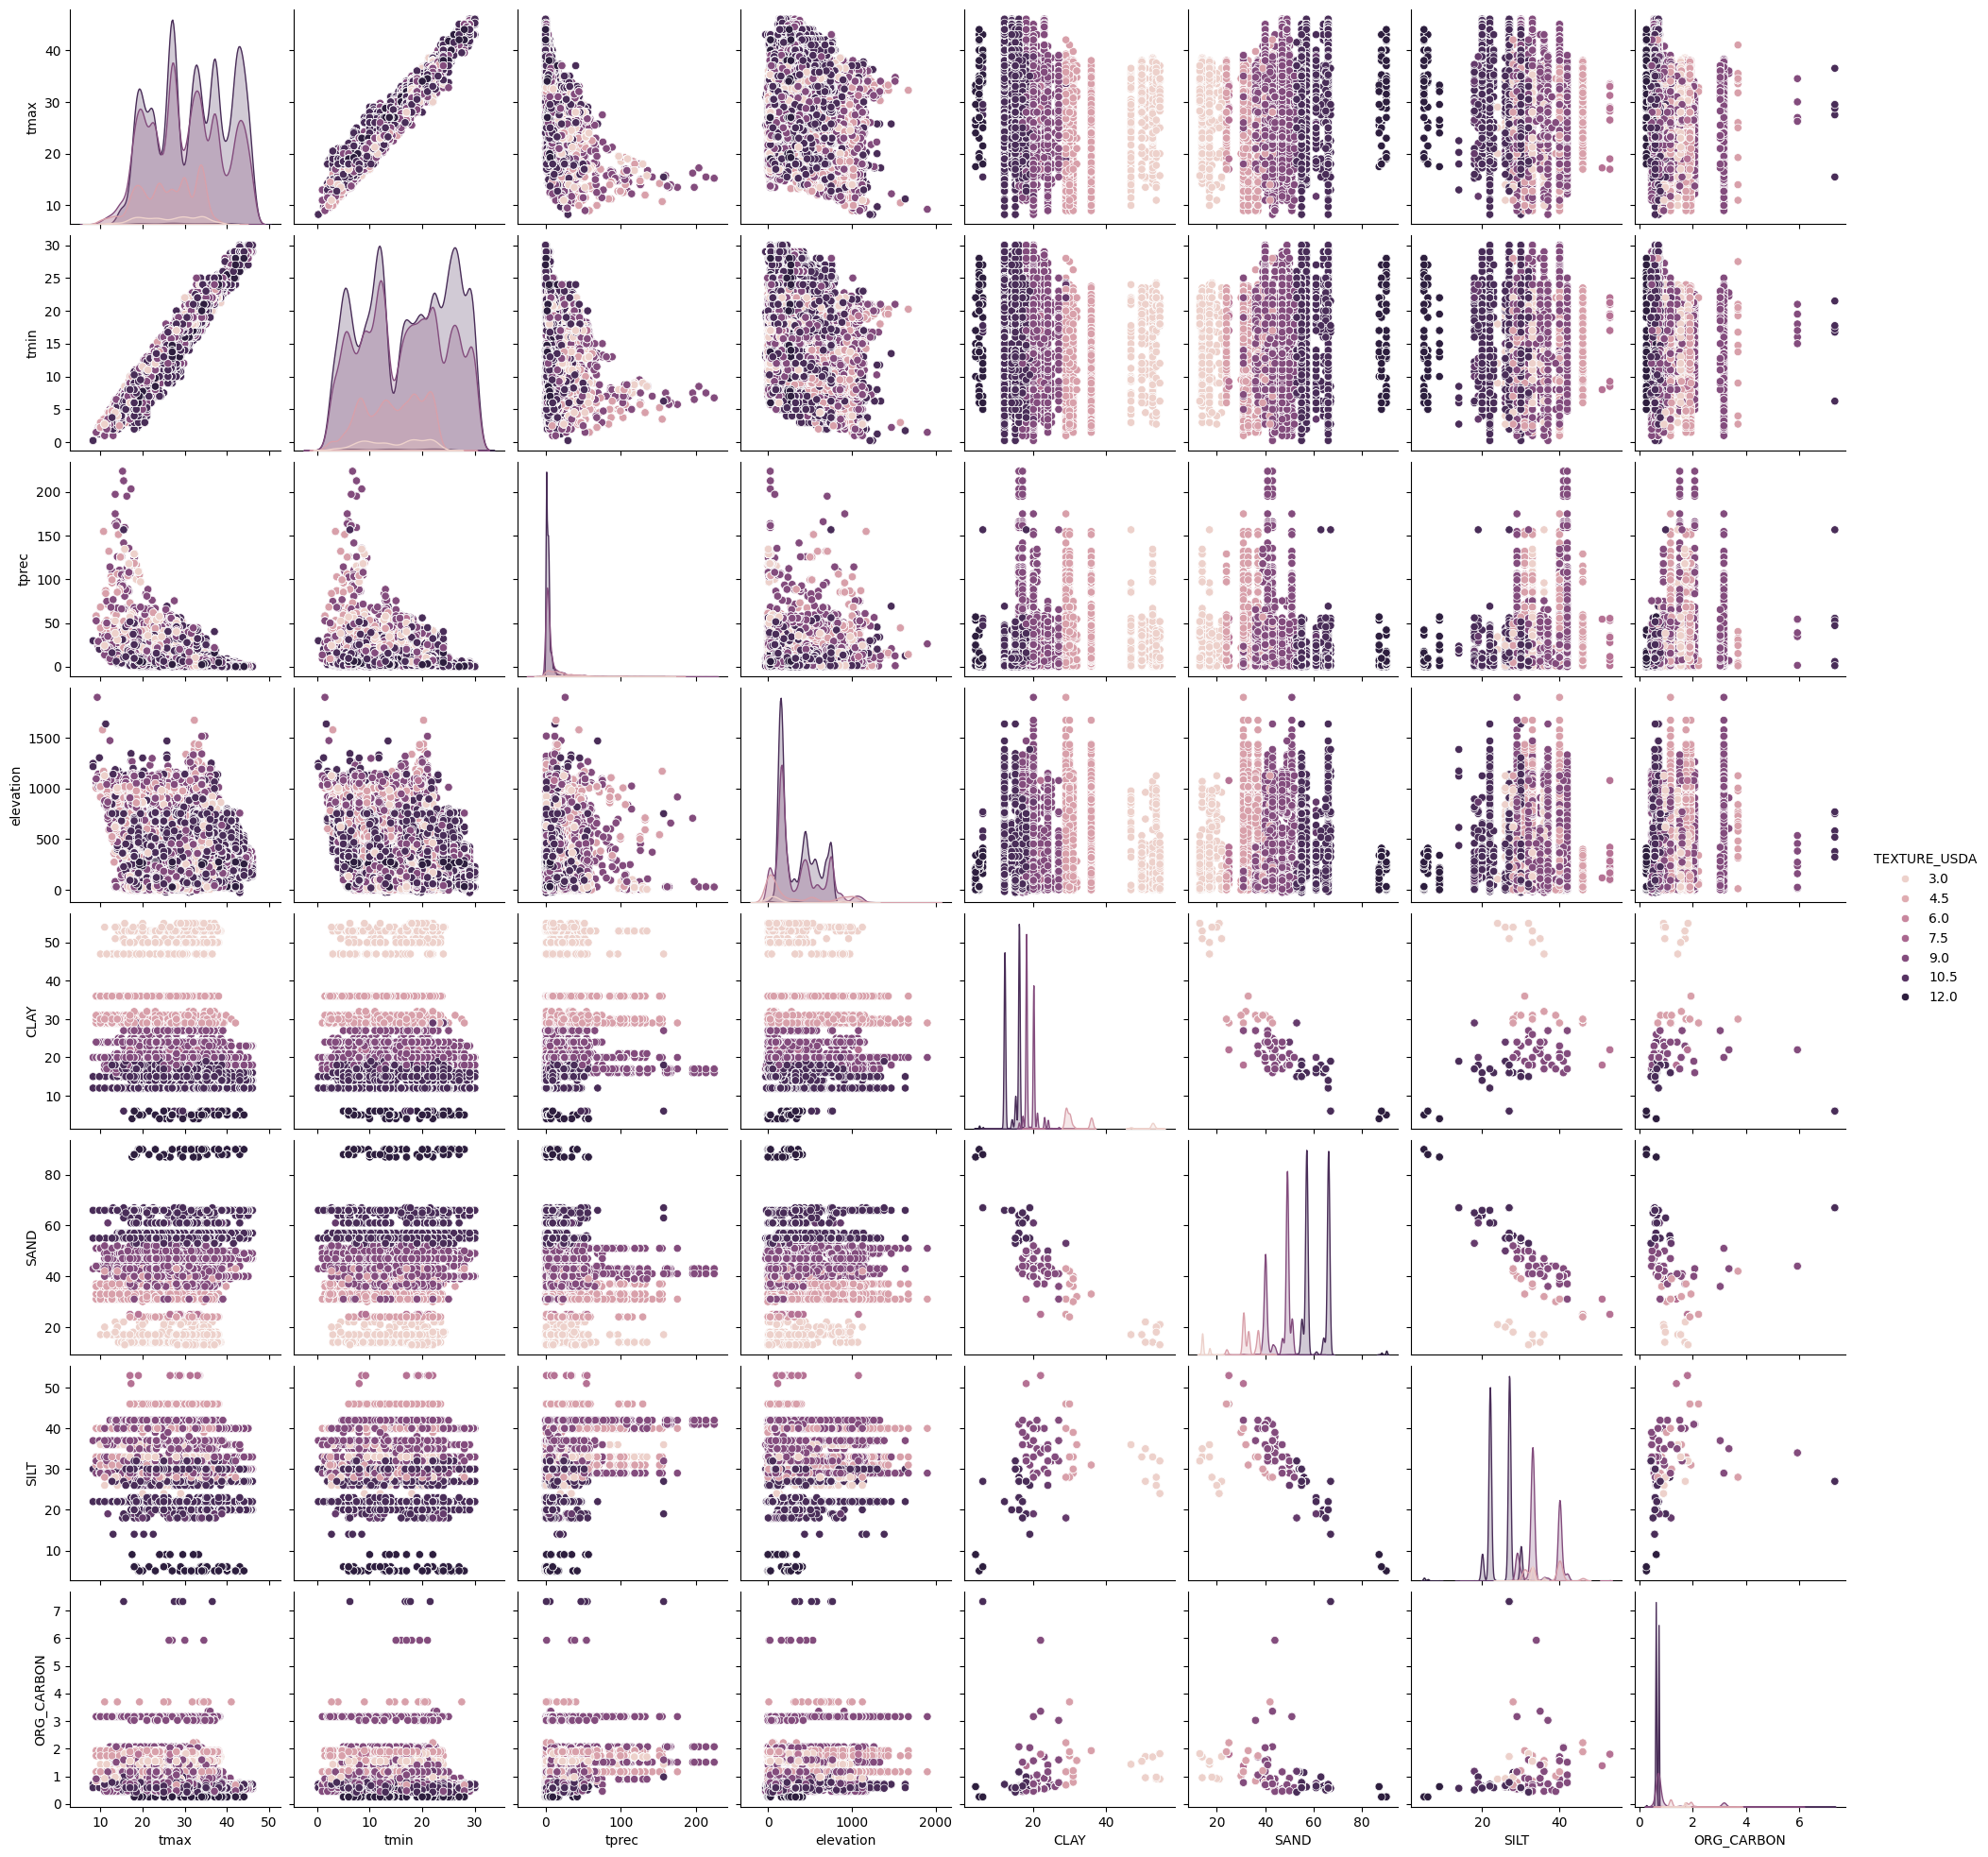

In [12]:
# dont plot again takes time

plot_correlation_matrix(merged[num_cols])

pp_cols = [c for c in ["tmax","tmin","tprec","elevation","CLAY","SAND","SILT","ORG_CARBON"] if c in merged.columns]
hue_col = "TEXTURE_USDA" if "TEXTURE_USDA" in merged.columns else None
if len(pp_cols) >= 2:
    plot_pairplot(merged, columns=pp_cols, hue=hue_col)


## 🧩 Class‑wise Comparisons

Compare distributions across key categories (landcover and soil texture classes) to highlight group differences.


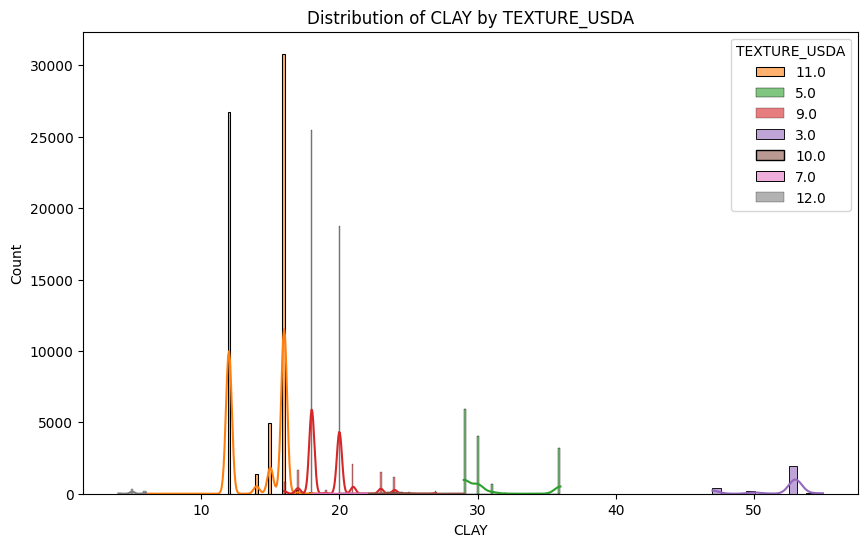

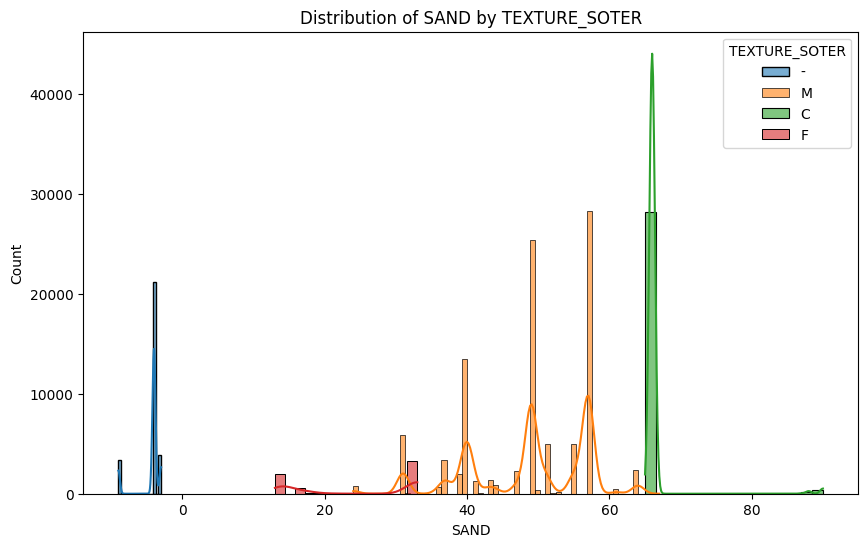

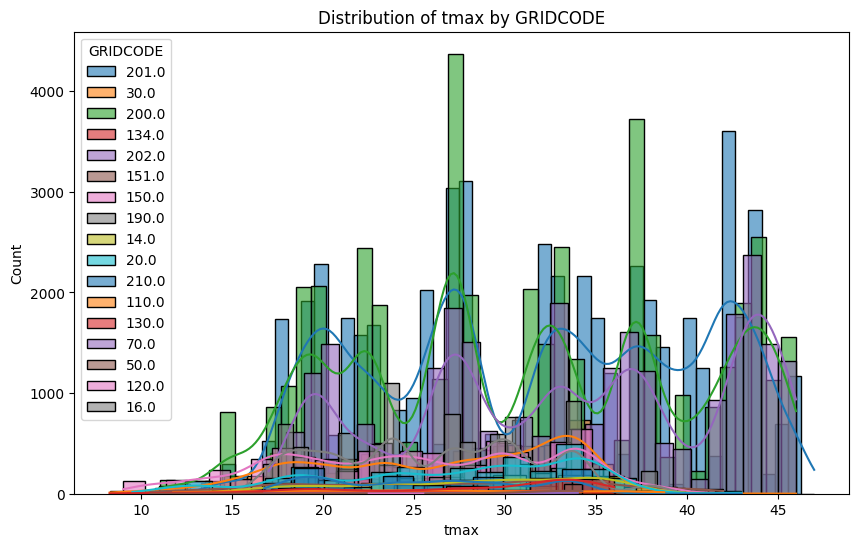

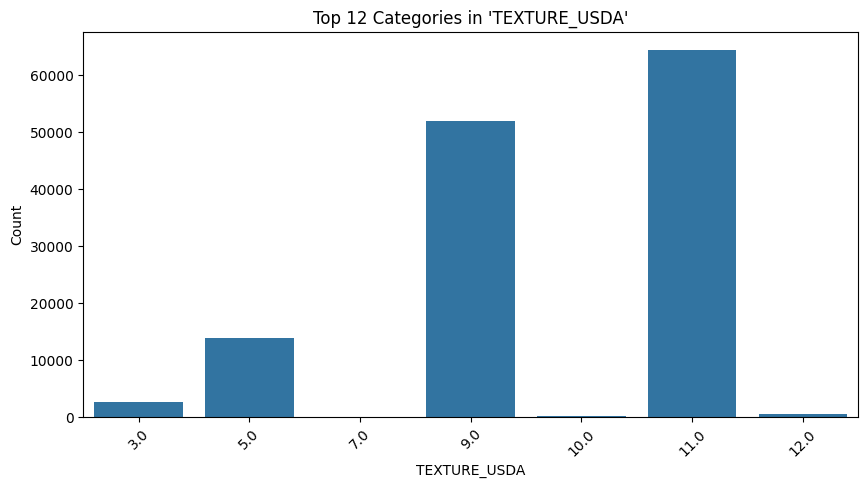

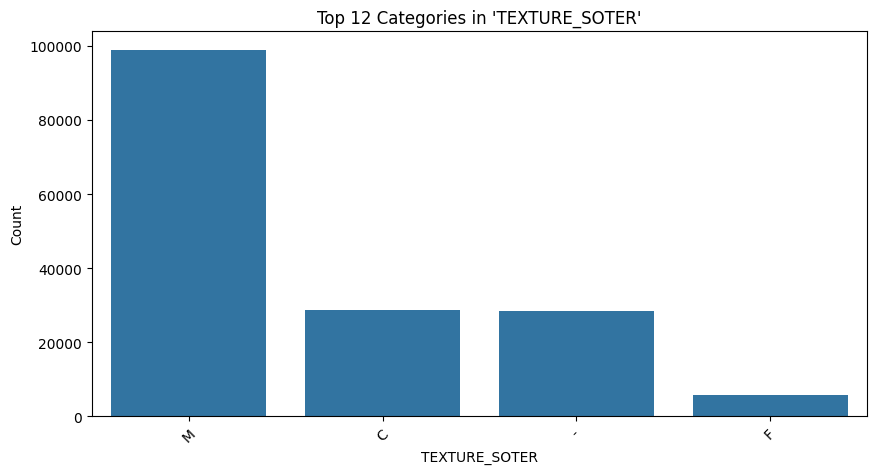

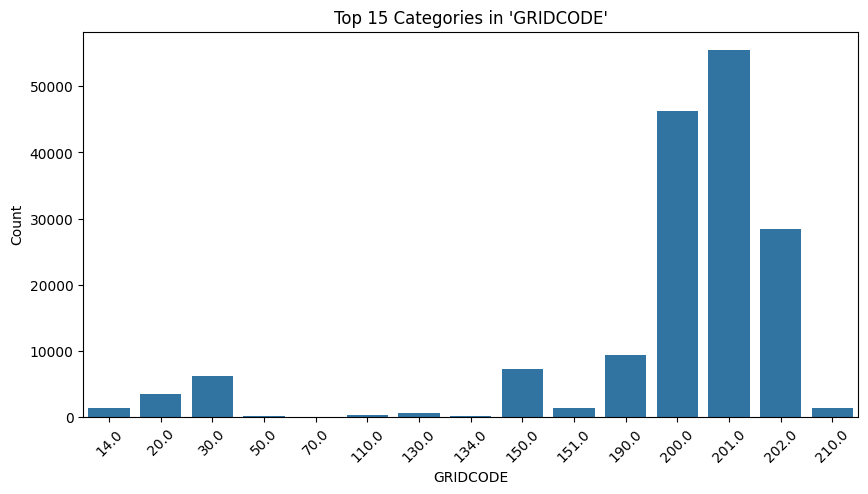

In [9]:
if {"CLAY","TEXTURE_USDA"}.issubset(merged.columns):
    compare_distributions(merged, "CLAY", by="TEXTURE_USDA")

if {"SAND","TEXTURE_SOTER"}.issubset(merged.columns):
    compare_distributions(merged, "SAND", by="TEXTURE_SOTER")

if {"tmax","GRIDCODE"}.issubset(merged.columns):
    compare_distributions(merged, "tmax", by="GRIDCODE")

# Category frequency views
if "TEXTURE_USDA" in merged.columns:
    plot_categorical_distribution(merged, "TEXTURE_USDA", top_n=12)
if "TEXTURE_SOTER" in merged.columns:
    plot_categorical_distribution(merged, "TEXTURE_SOTER", top_n=12)
if "GRIDCODE" in merged.columns:
    plot_categorical_distribution(merged, "GRIDCODE", top_n=15)


## 🗓️ Temporal Patterns

If a `month` field exists, chart seasonal trends for climatic variables such as Tmax and total precipitation.


In [10]:
if {"month","tmax"}.issubset(merged.columns):
    merged.groupby("month")["tmax"].mean().plot(kind="line", marker="o")
    plt.title("Mean Tmax by Month"); plt.xlabel("Month"); plt.ylabel("°C"); plt.grid(True); plt.show()

if {"month","tprec"}.issubset(merged.columns):
    merged.groupby("month")["tprec"].sum().plot(kind="bar", color="#4c78a8")
    plt.title("Total Precipitation by Month"); plt.xlabel("Month"); plt.ylabel("mm"); plt.show()


## 🎯 Targeted Relationships

Inspect a few interpretable relationships (e.g., temperature vs elevation; texture trade‑offs).


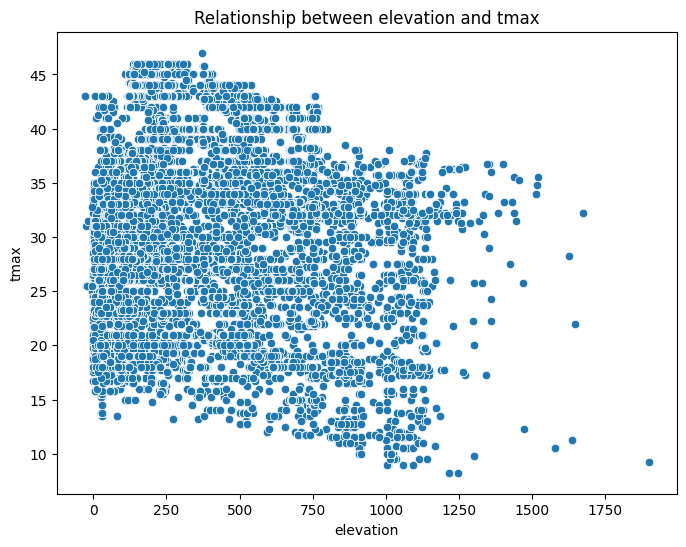

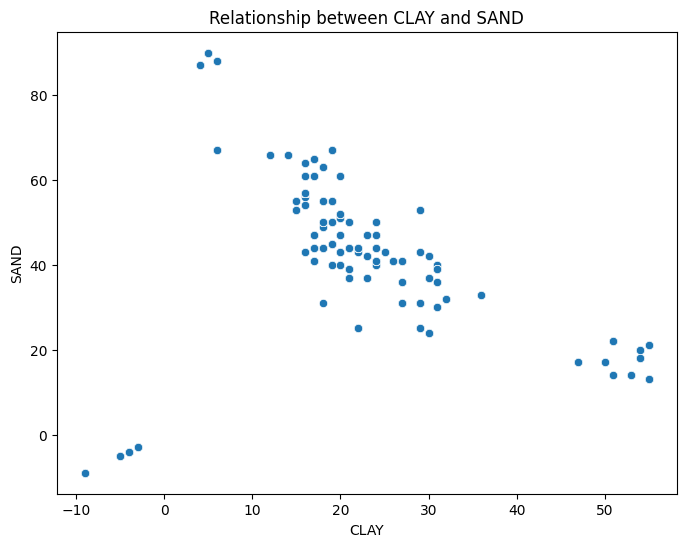

In [11]:
if {"elevation","tmax"}.issubset(merged.columns):
    plot_scatter(merged, "elevation", "tmax")

if {"CLAY","SAND"}.issubset(merged.columns):
    plot_scatter(merged, "CLAY", "SAND")


## 🧰 Preprocessing Rationale (Step‑by‑Step, Matching the Code)

This block transforms the merged dataset into a clean, model‑ready table while minimizing information loss and keeping the pipeline reproducible.

### 1) Work on a Safe Copy
We start with `df = merged.copy()` to preserve the original merged table. Keeping raw data intact ensures traceability, easy rollback, and side‑by‑side comparisons of different preprocessing choices.

### 2) Handle Missing Values Strategically (Numerics)
For every numeric feature listed in `num_cols`, we apply median imputation:
- Median is robust to outliers and preserves central tendency when distributions are skewed.
- This is particularly suitable for environmental variables (e.g., `tmax`, `tmin`, `tprec`, soil properties) that may contain extreme values but should not be distorted.

Code reflection:
- The loop checks column existence and fills NaNs with `df[col].median()`.

### 3) Handle Missing Values Strategically (Categoricals)
For every categorical column (`dtype == object`), we fill missing values with the explicit label `"Unknown"`:
- Retains all rows without discarding data.
- Makes imputation transparent and learnable (models can assign a weight to the unknown category).
- Ensures consistent category handling in later visualizations and encodings.

Code reflection:
- `cat_cols` detects categorical columns; a single pass replaces NaNs with `"Unknown"`.

### 4) Categorical Normalization and Encoding
We one‑hot encode the key categorical variables: `TEXTURE_USDA`, `TEXTURE_SOTER`, `GRIDCODE`, and `daynight` (only if present), using `drop_first=True`:
- Converts categories into numeric indicators compatible with ML algorithms.
- `drop_first=True` avoids the dummy‑variable trap and reduces redundancy for linear models.
- Keeps the `"Unknown"` bucket explicit so the model can learn from it.

Code reflection:
- `pd.get_dummies(..., drop_first=True)` expands only the selected columns, leaving others intact.

### 5) Numeric Standardization (Optional but Recommended)
We standardize the numeric columns actually present after encoding (`num_cols_present`) with a `StandardScaler`:
- Brings variables to zero mean and unit variance, improving optimization stability and convergence.
- Especially beneficial for regularized linear models, distance‑based methods, and neural networks.
- The code guards against empty lists and only transforms if numerics exist.

Code reflection:
- `scaler.fit_transform` is applied to `num_cols_present` to avoid errors if some columns are absent.

### 6) Persist a Clean, Reproducible Artifact
We write the final processed table to `../data/Merged/merged_clean.csv`:
- Provides a stable, versionable artifact for modeling and sharing.
- Leaves `merged` unchanged, preserving the raw/clean separation for auditability.

Why this design:
- Dropping rows (e.g., to remove NaNs) would have reduced sample size and biased the dataset.
- Using robust median imputation avoids skew from outliers.
- One‑hot encoding with an explicit `"Unknown"` category makes imputation decisions traceable and model‑friendly.
- Standardization aligns feature scales, preventing any single variable from dominating the learning process.

Outcome:
- A clean, encoded, and standardized dataset ready for EDA summaries, modeling pipelines, and reproducible experimentation.


✅ Loaded: ../data/Merged/merged_clean.csv  —  shape=(161881, 78)
Remaining missing counts:
 REF_BULK    0
tmax        0
tmin        0
tprec       0
dtype: int64
Non‑finite numeric columns: None


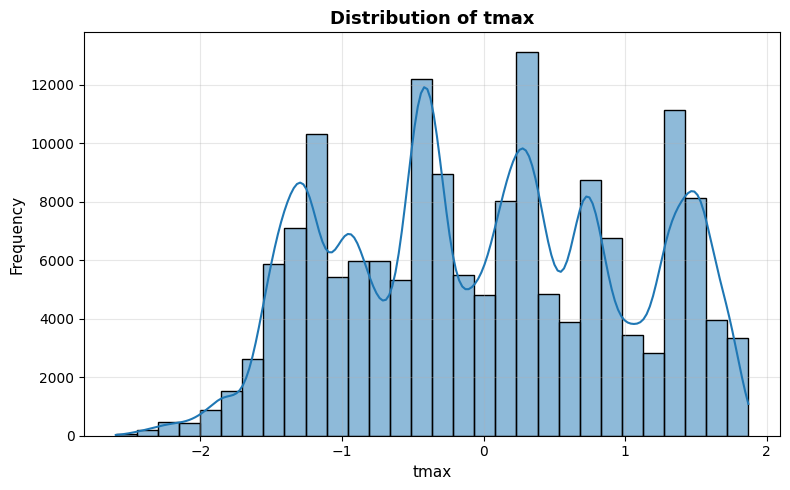

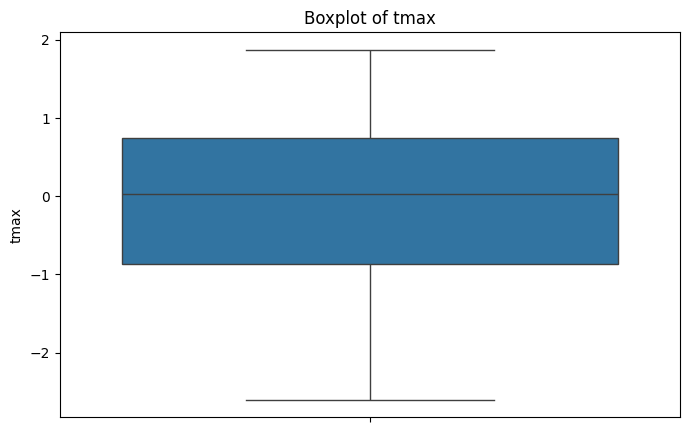

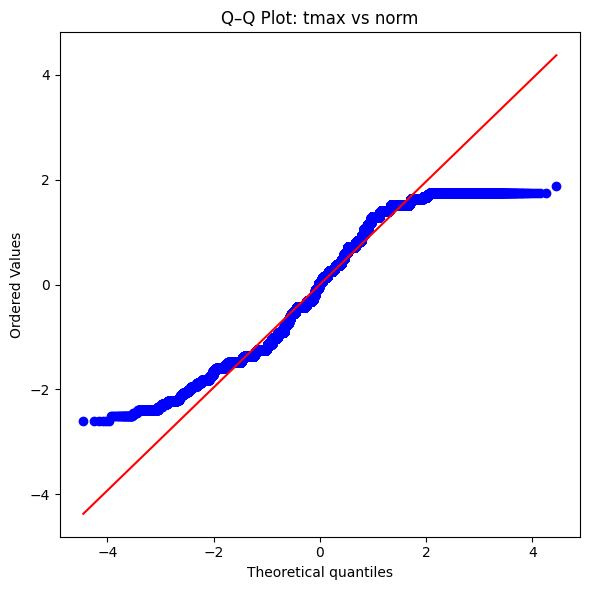

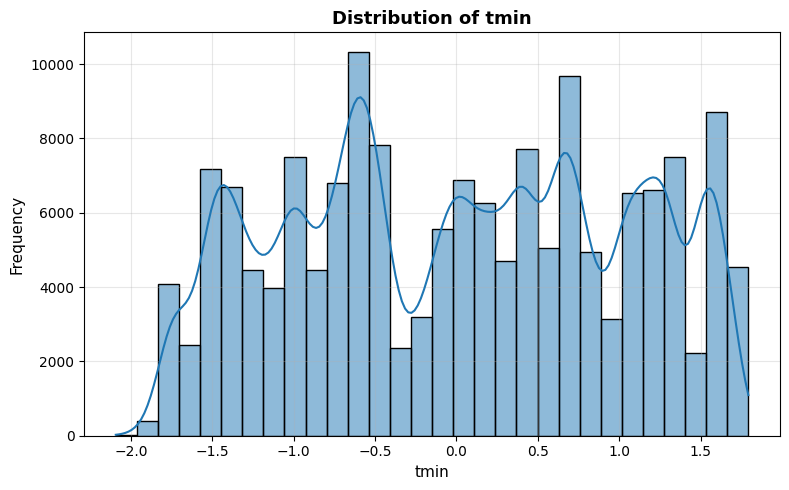

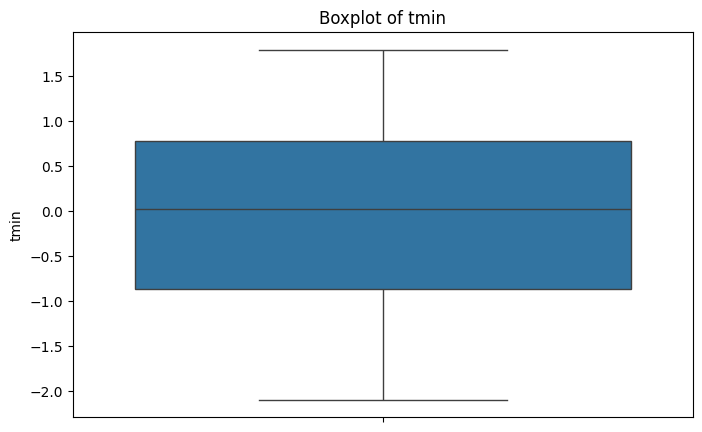

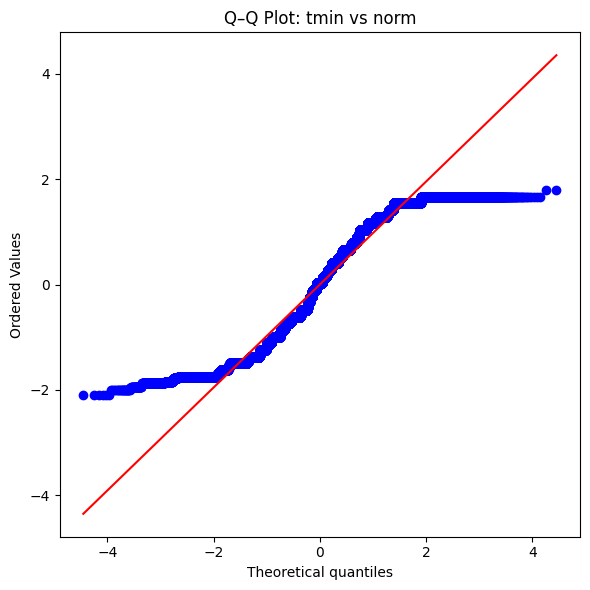

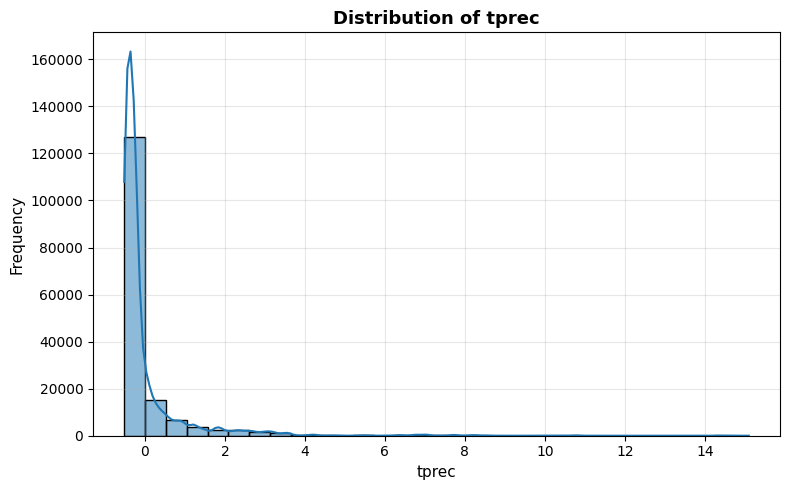

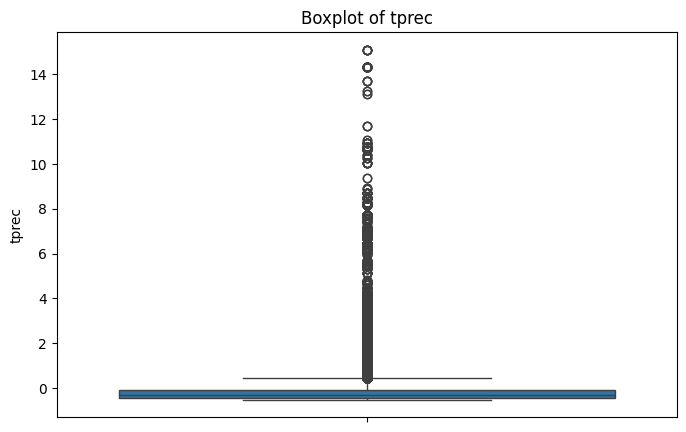

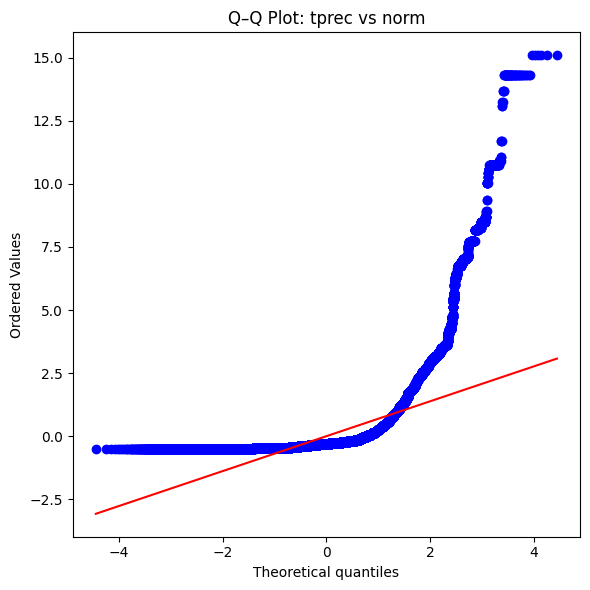

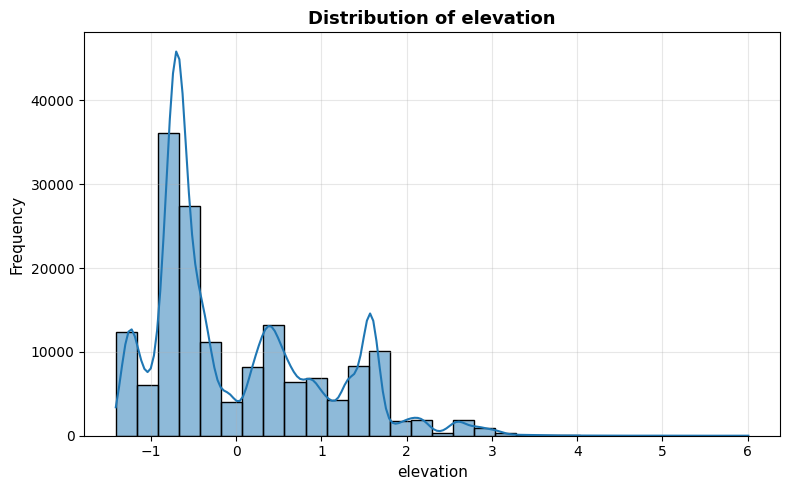

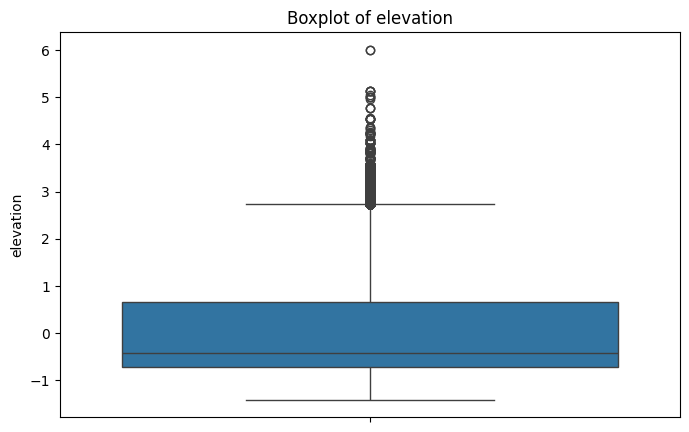

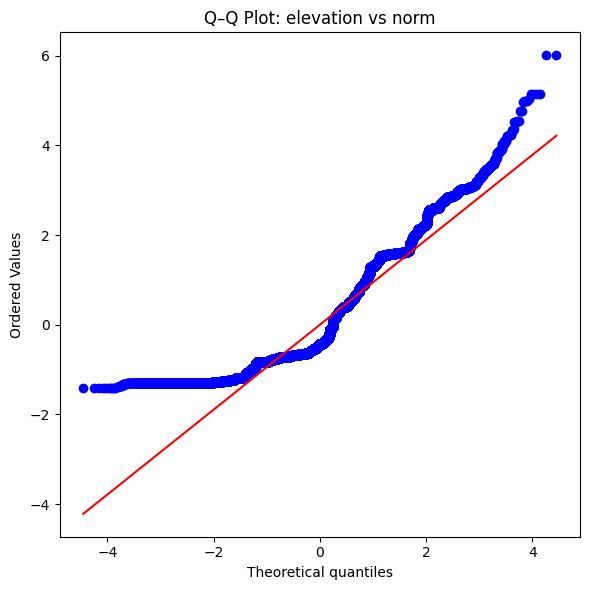

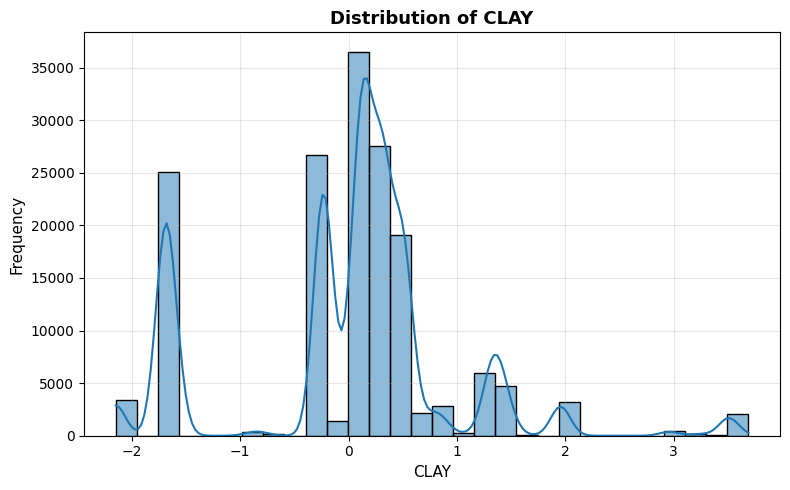

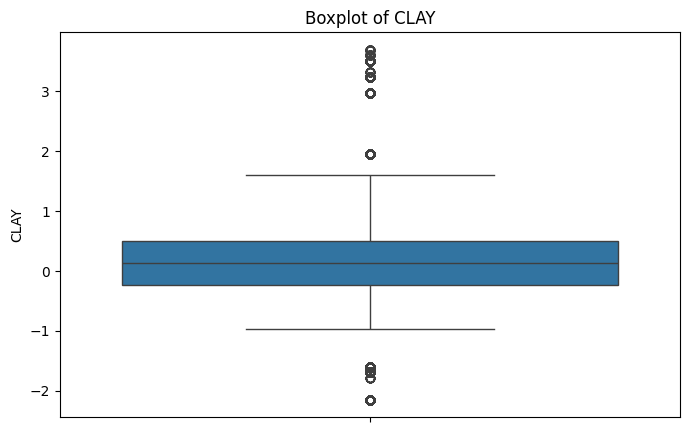

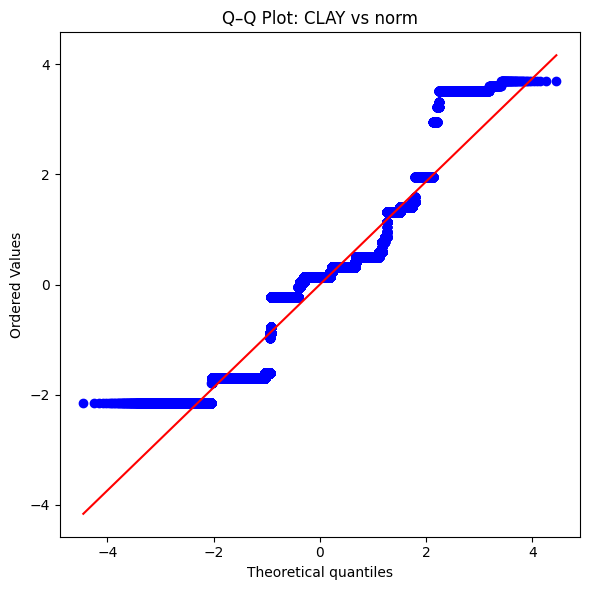

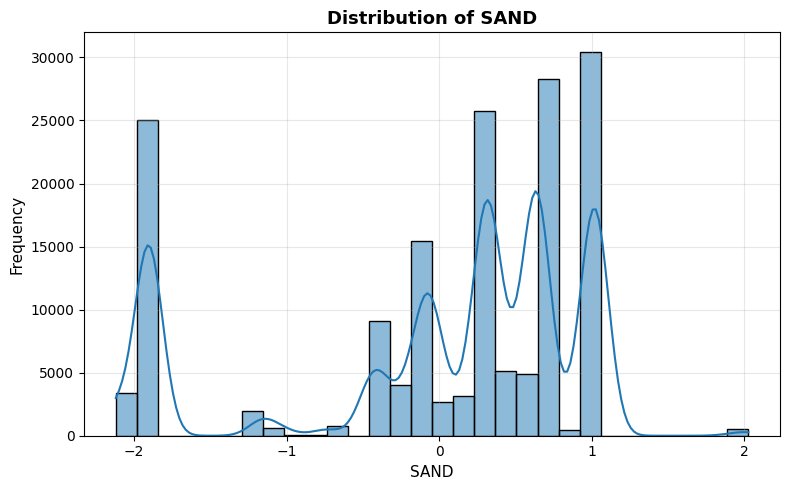

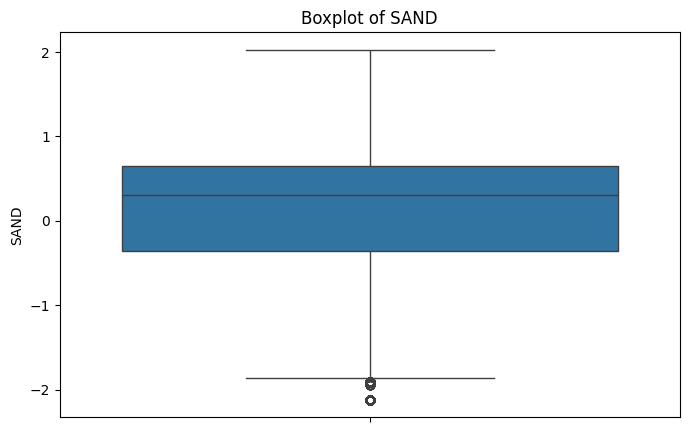

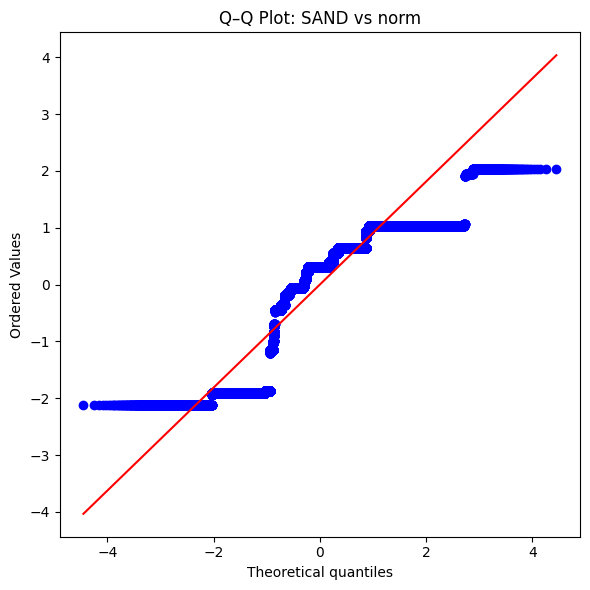

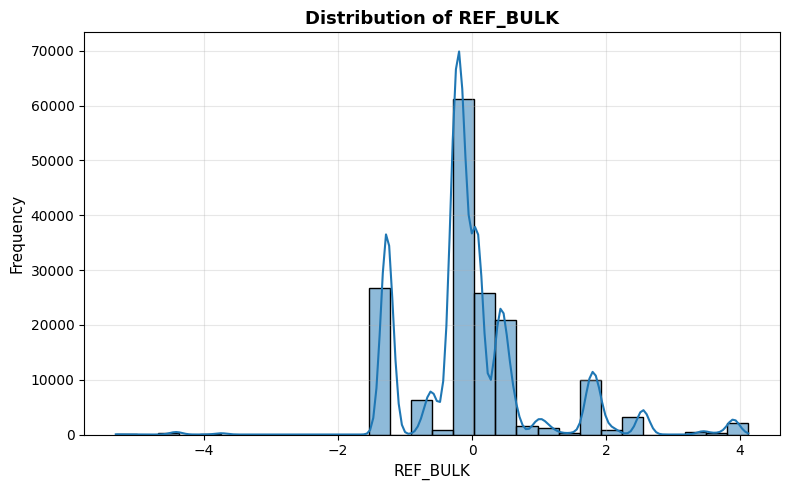

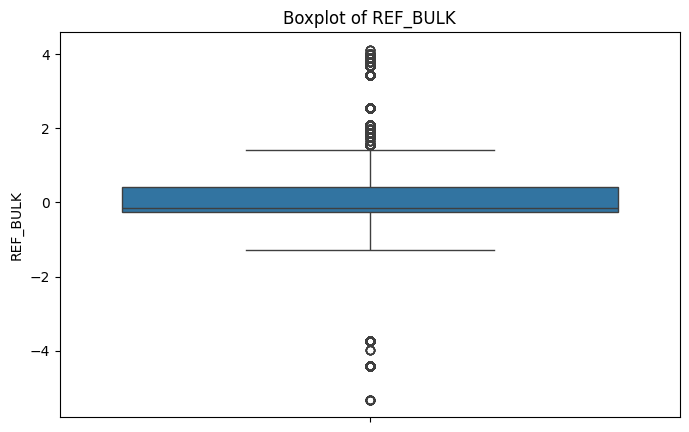

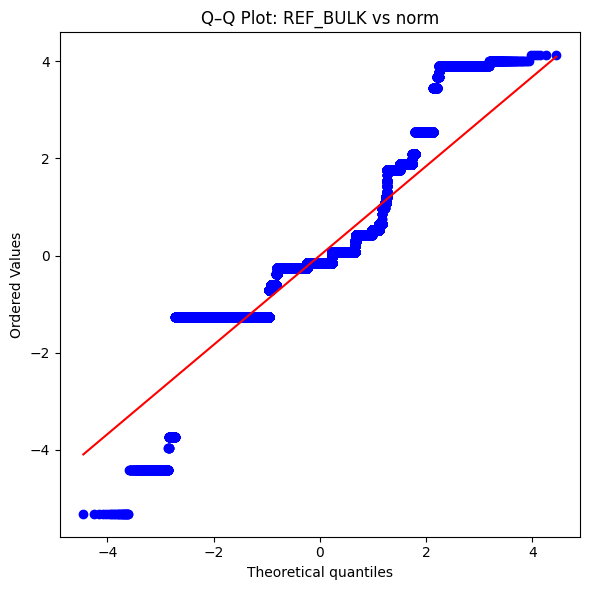

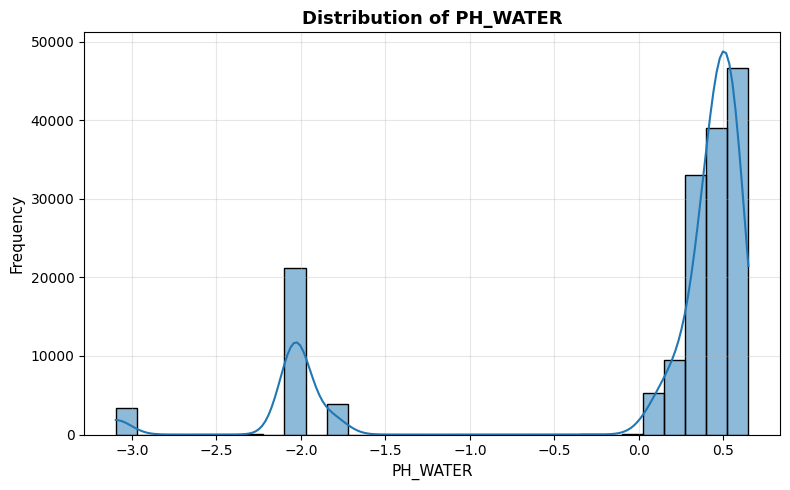

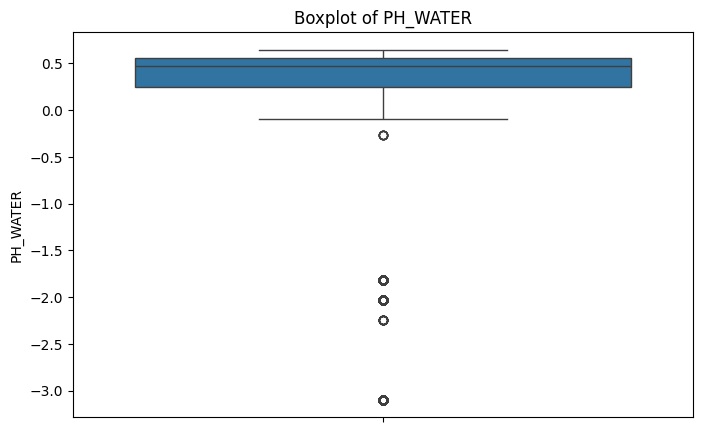

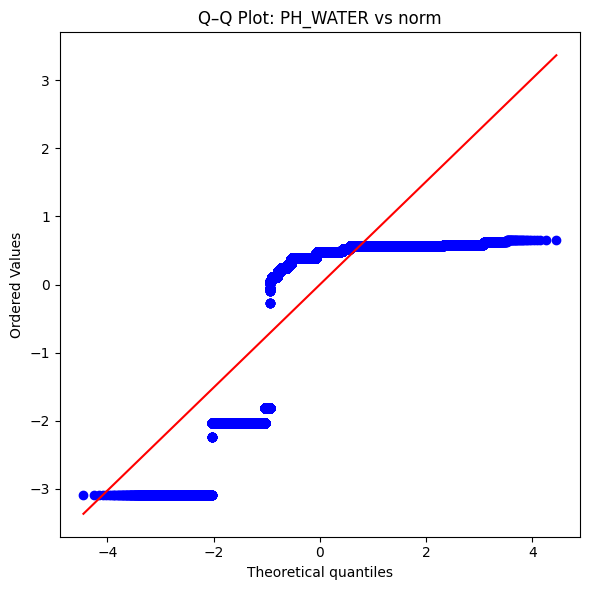

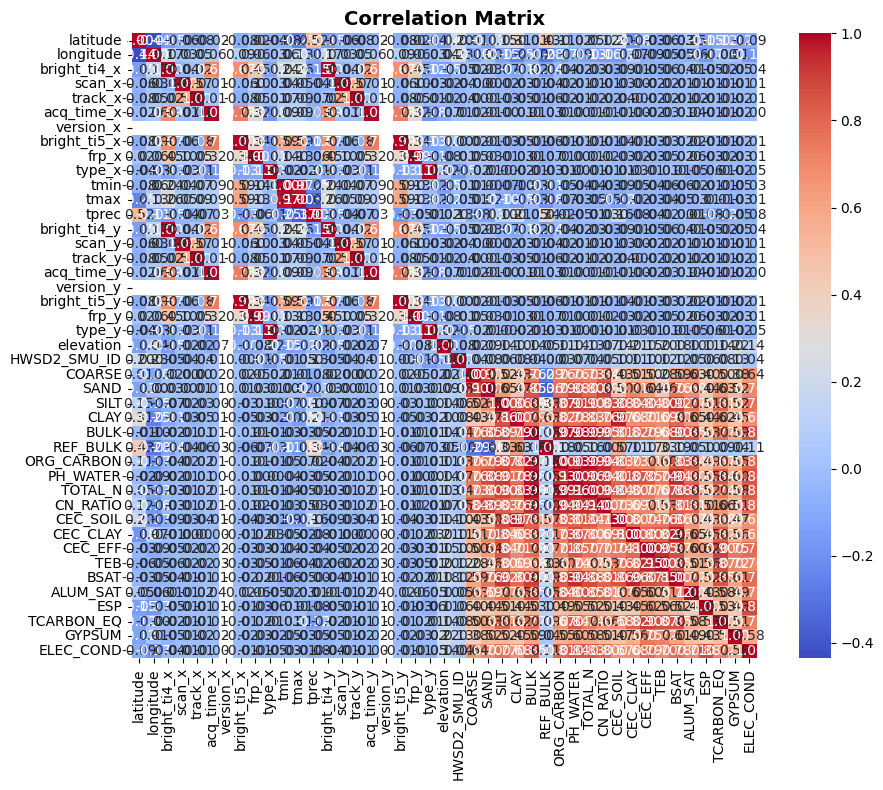

In [17]:

clean_path = "../data/Merged/merged_clean.csv"
df = pd.read_csv(clean_path)
print(f"✅ Loaded: {clean_path}  —  shape={df.shape}")

# 1) Missing values should be zero on the key fields
check_cols = [c for c in ["TEXTURE_USDA","REF_BULK","tmax","tmin","tprec","GRIDCODE"] if c in df.columns]
print("Remaining missing counts:\n", df[check_cols].isnull().sum())

# 2) Ensure numeric columns have only finite values
num_cols_check = df.select_dtypes(include=np.number).columns
bad_cols = [c for c in num_cols_check if not np.isfinite(df[c]).all()]
print("Non‑finite numeric columns:", bad_cols if bad_cols else "None")

# 3) Quick distributions for a sanity glance
focus = [c for c in ["tmax","tmin","tprec","elevation","CLAY","SAND","REF_BULK","PH_WATER"] if c in df.columns]
for col in focus:
    plot_variable_distribution(df, col, bins=30)
    plot_boxplot(df, col)
    plot_qq(df, col)

# 4) Correlation snapshot
if len(num_cols_check) > 1:
    plot_correlation_matrix(df[num_cols_check])
